In [106]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz

In [107]:
mushrooms = pd.read_csv('data/mushrooms.csv', encoding = "ISO-8859-1")

In [108]:
mushrooms.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [109]:
column_name = 'stalk-root'
question_mark_count = mushrooms[column_name].str.count('\?').sum()

In [110]:
print(question_mark_count)

2480


In [111]:
mushrooms.shape

(8124, 23)

Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [112]:
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [113]:
mushrooms.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [114]:
mushrooms['class'].unique()

array(['p', 'e'], dtype=object)

**From the above code we can see there are 2 classes of Mushrooms - Poisonous and Edible.**

## Exploratory Data Analysis

In the EDA step, We visualize each feature by its class distribution. The "class" refers that the information of this mushroom is edible or poisonous.

### Mushroom Class

In [115]:
labels = ['Edible', 'Poisonous']
values = [mushrooms.describe()['class']['freq'], mushrooms.describe()['class']['count']-mushrooms.describe()['class']['freq']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors), textfont_size=25)
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

### Cap Shapes

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

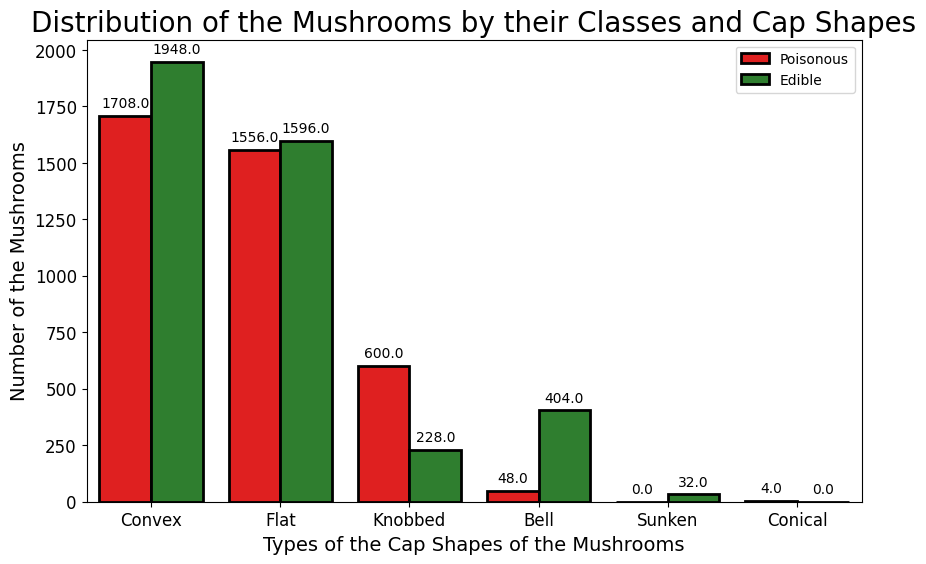

In [116]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=mushrooms, x='cap-shape',
                      hue='class',
                      order=mushrooms['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

### Cap Surfaces

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Surfaces')

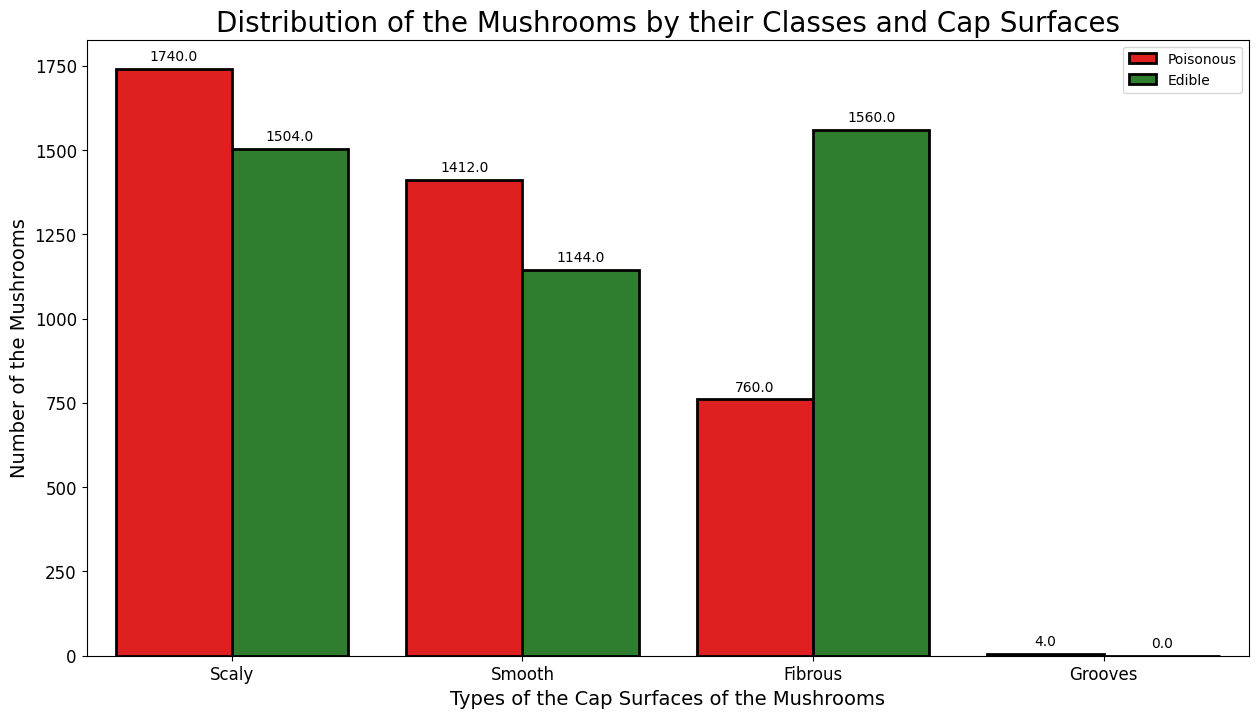

In [117]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='cap-surface',
                      hue='class',
                      order=mushrooms['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surfaces', fontsize=20)

### Cap Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Colors')

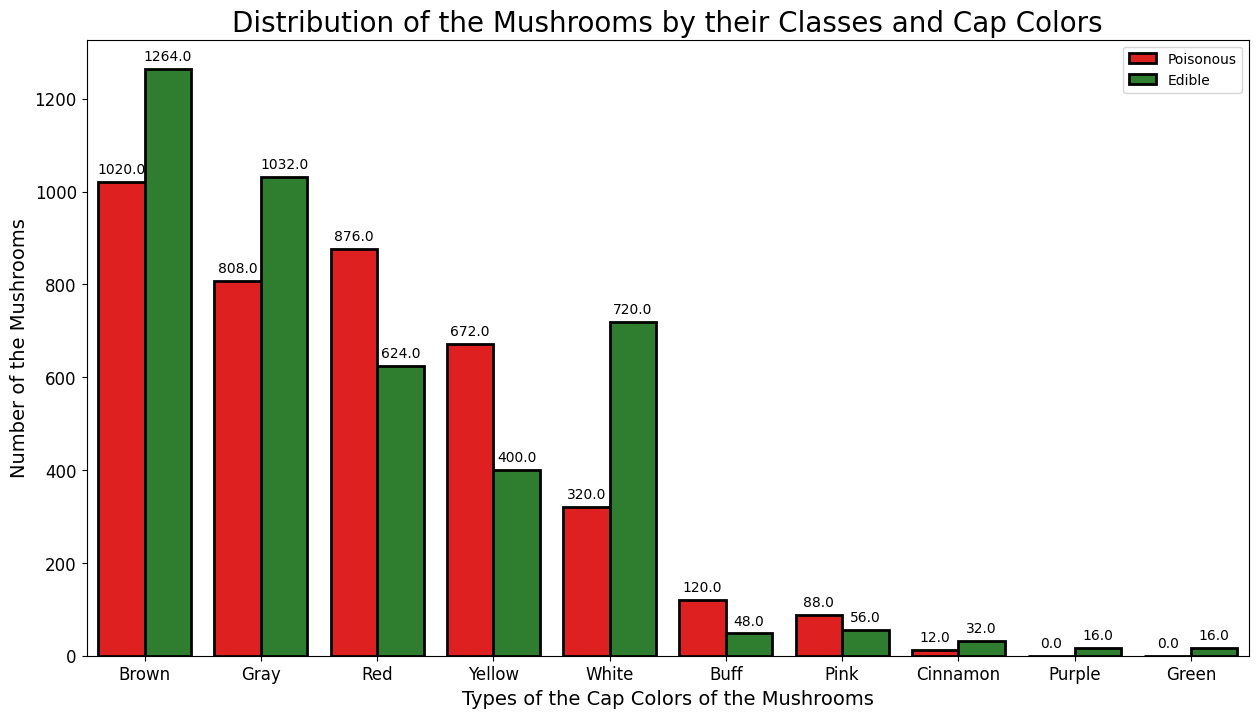

In [118]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='cap-color',
                      hue='class',
                      order=mushrooms['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Colors', fontsize=20)

### Bruises

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Bruises')

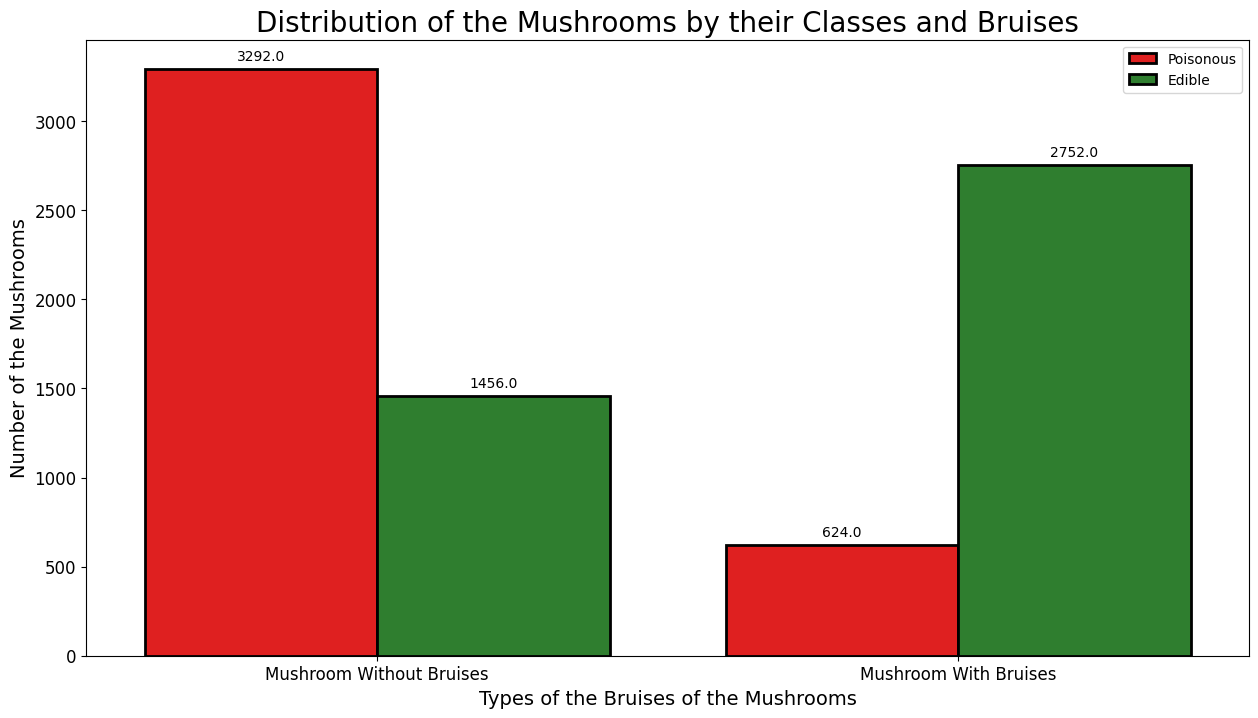

In [119]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='bruises',
                      hue='class',
                      order=mushrooms['bruises'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Mushroom Without Bruises', 'Mushroom With Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Bruises of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Bruises', fontsize=20)

### Odor

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Odor')

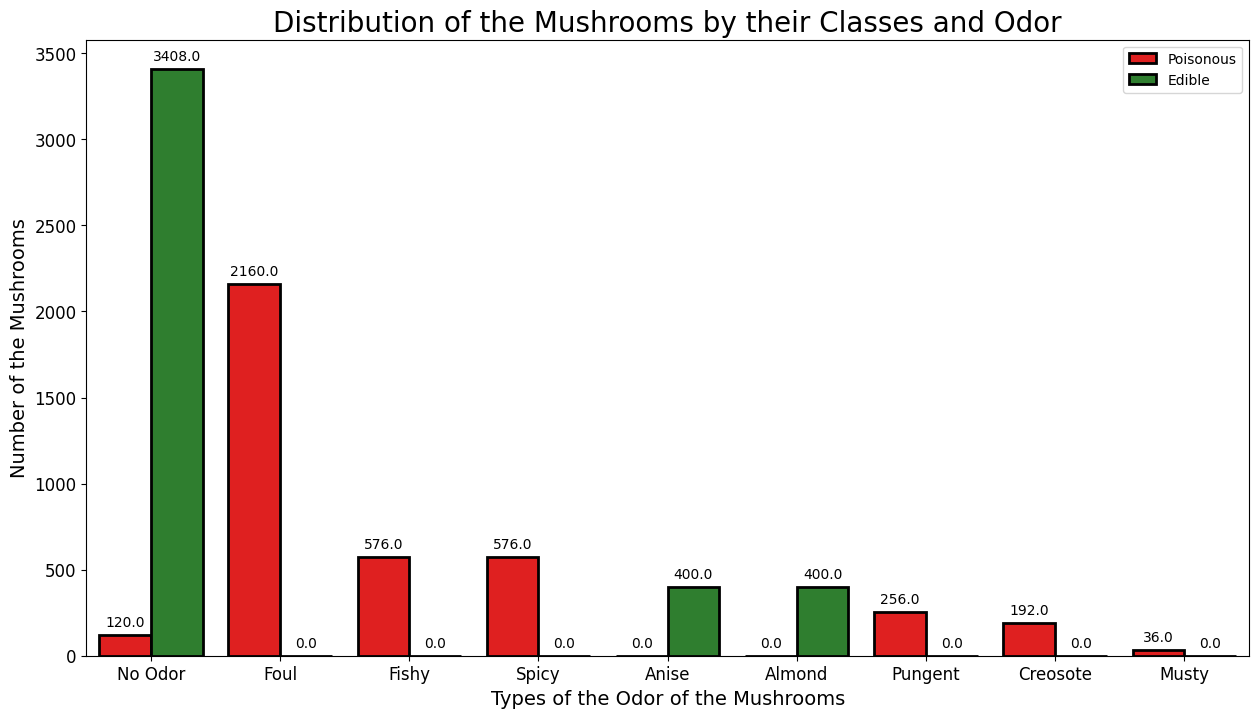

In [120]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='odor',
                      hue='class',
                      order=mushrooms['odor'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent', 'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Odor', fontsize=20)

### Gill Attachment

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Attachment')

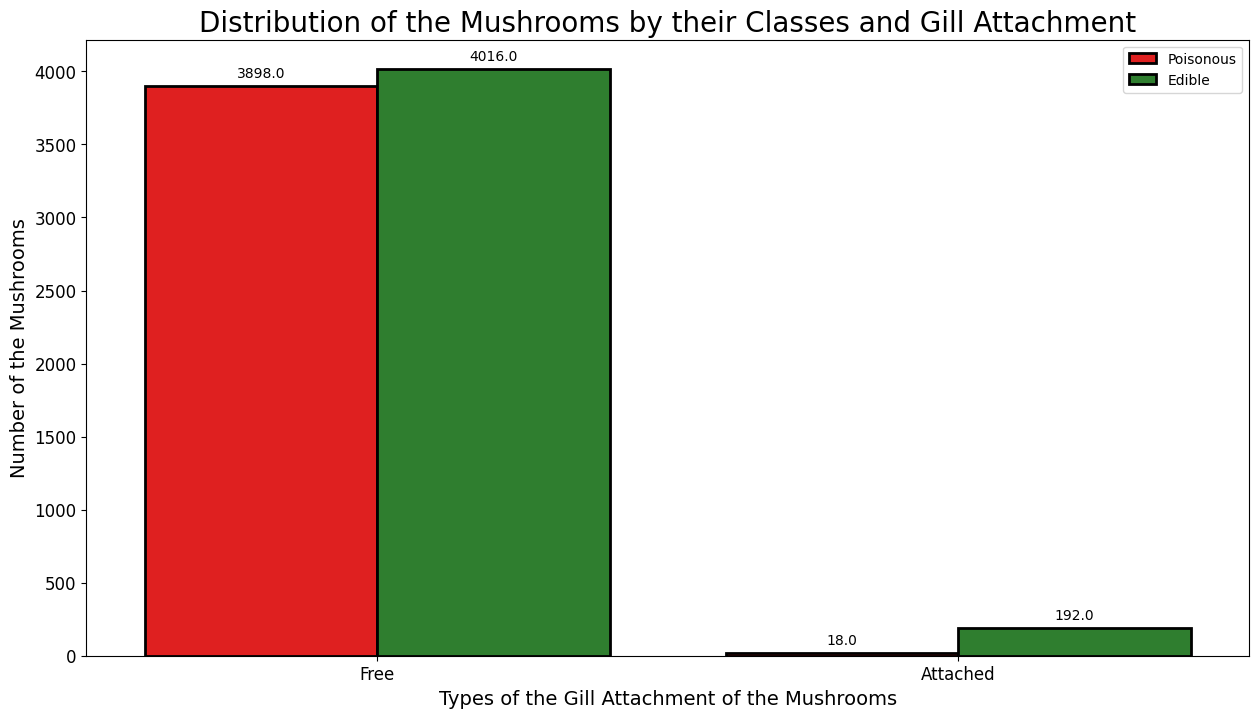

In [121]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='gill-attachment',
                      hue='class',
                      order=mushrooms['gill-attachment'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Free', 'Attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Attachment of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Attachment', fontsize=20)

### Gill Spacing

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Spacing')

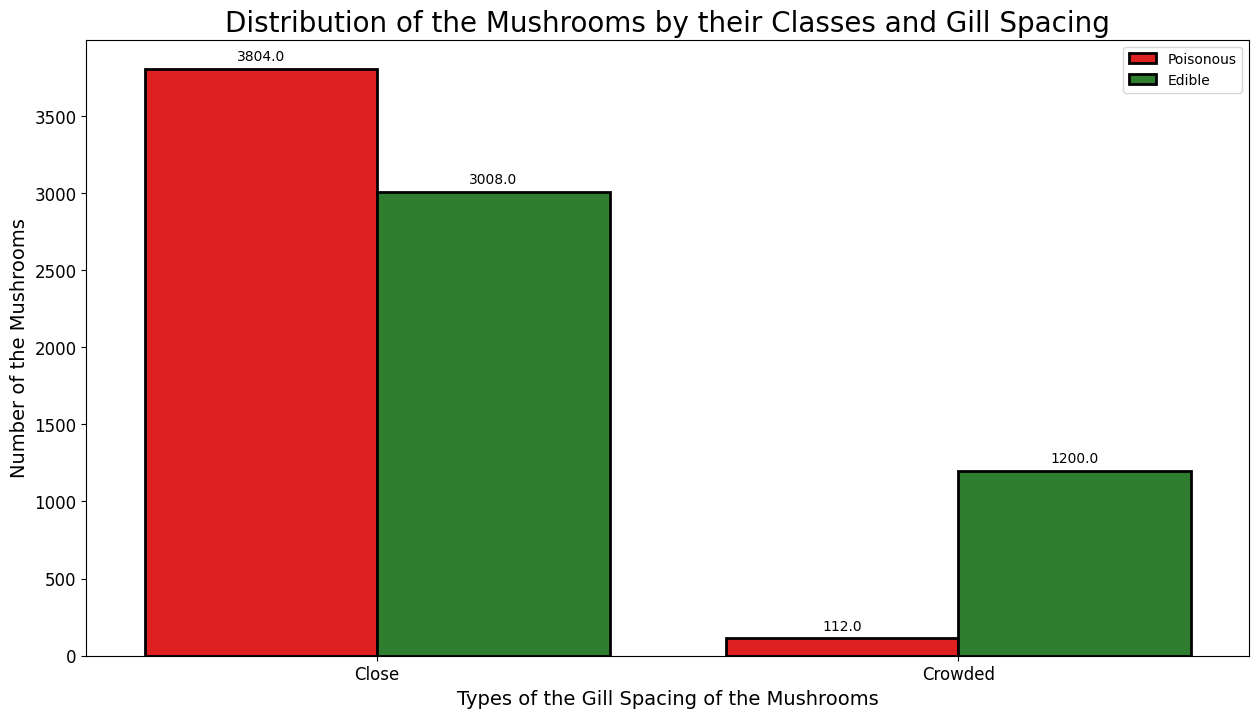

In [122]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='gill-spacing',
                      hue='class',
                      order=mushrooms['gill-spacing'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Close', 'Crowded'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Spacing of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Spacing', fontsize=20)

### Gill Color

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Colors')

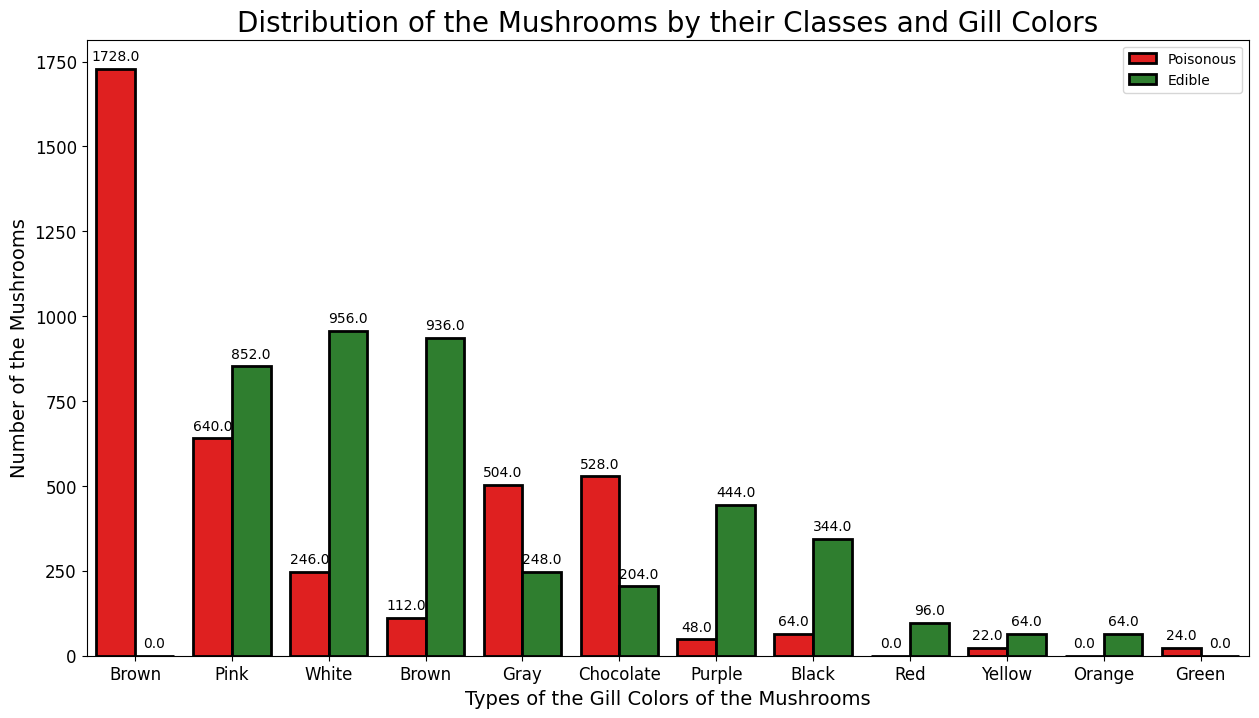

In [123]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='gill-color',
                      hue='class',
                      order=mushrooms['gill-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Brown', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red', 'Yellow', 'Orange', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Colors', fontsize=20)

### Stalk Shape

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Shape')

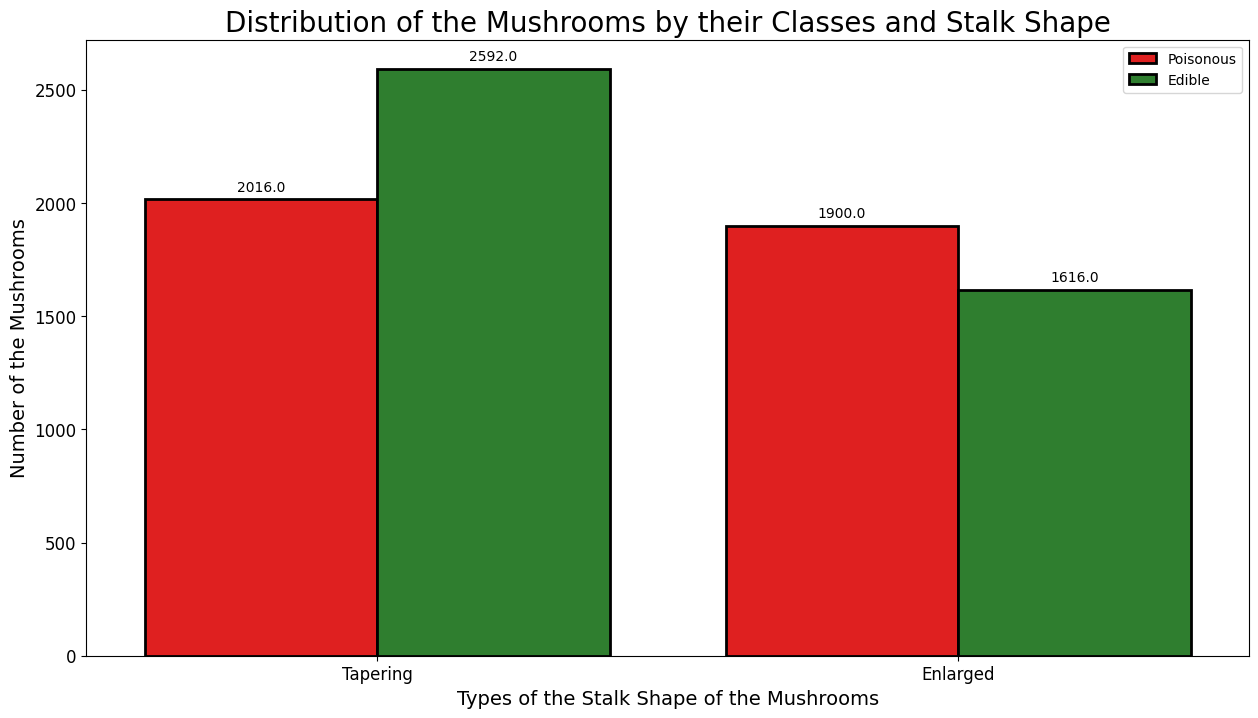

In [124]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='stalk-shape',
                      hue='class',
                      order=mushrooms['stalk-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Tapering', 'Enlarged'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Shape of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Shape', fontsize=20)

### Stalk Root

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Root')

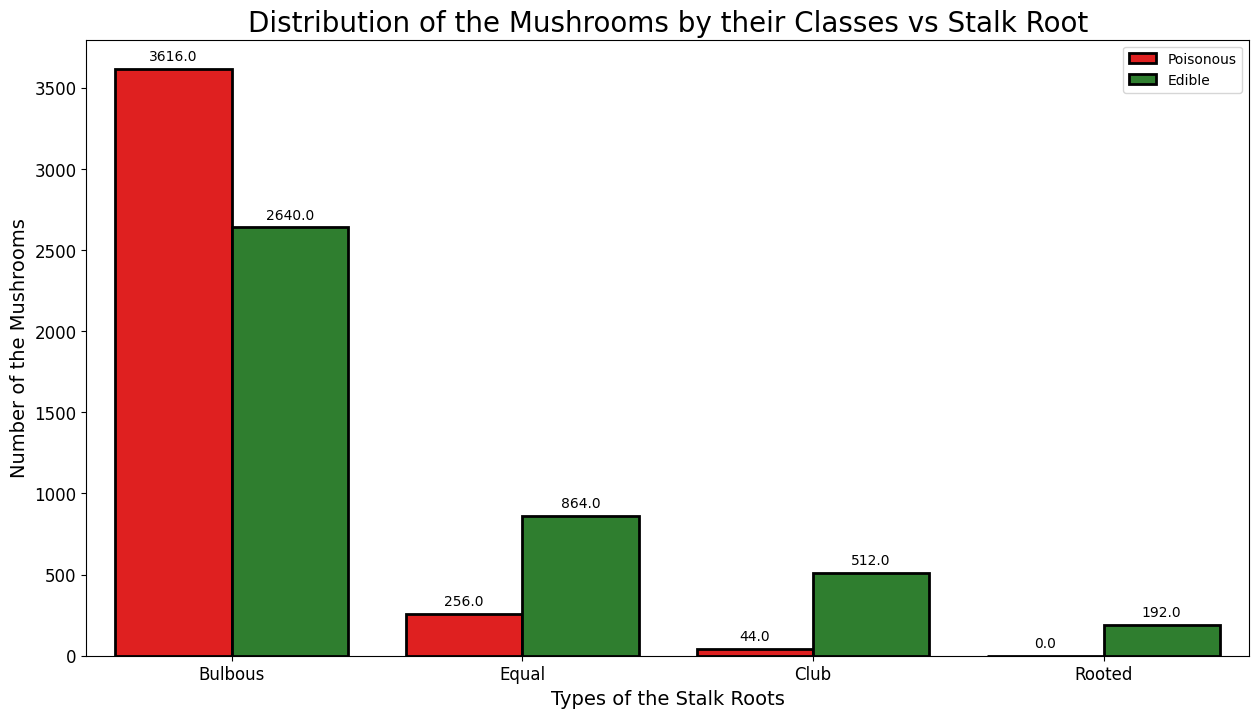

In [125]:
# The stalk-root feature has missing values. I filled the missing values with the most frequent object which is 'b'.
mushrooms = mushrooms.replace(['?'], 'b')

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='stalk-root',
                      hue='class',
                      order=mushrooms['stalk-root'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2
                      )

splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Roots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Root', fontsize=20)

### Stalk Surface Above and Below Ring

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Surface Above the Ring')

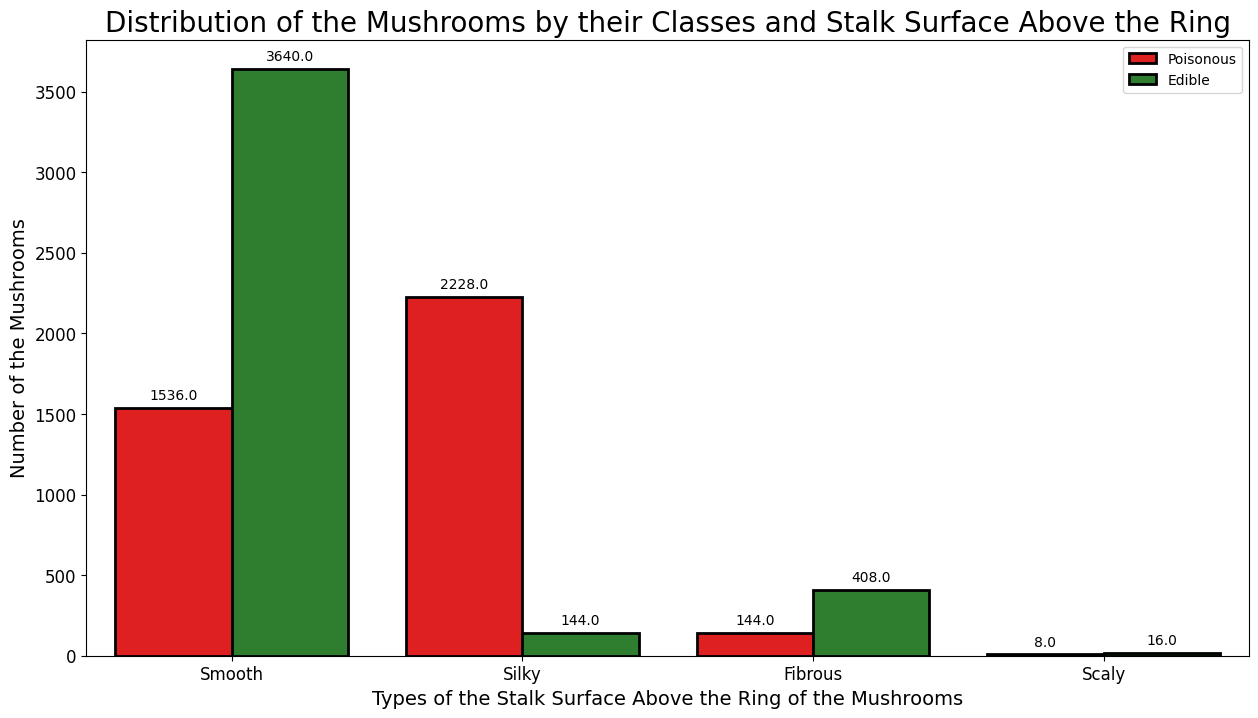

In [126]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='stalk-surface-above-ring',
                      hue='class',
                      order=mushrooms['stalk-surface-above-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surface Above the Ring of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Surface Above the Ring', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Surface Below the Ring')

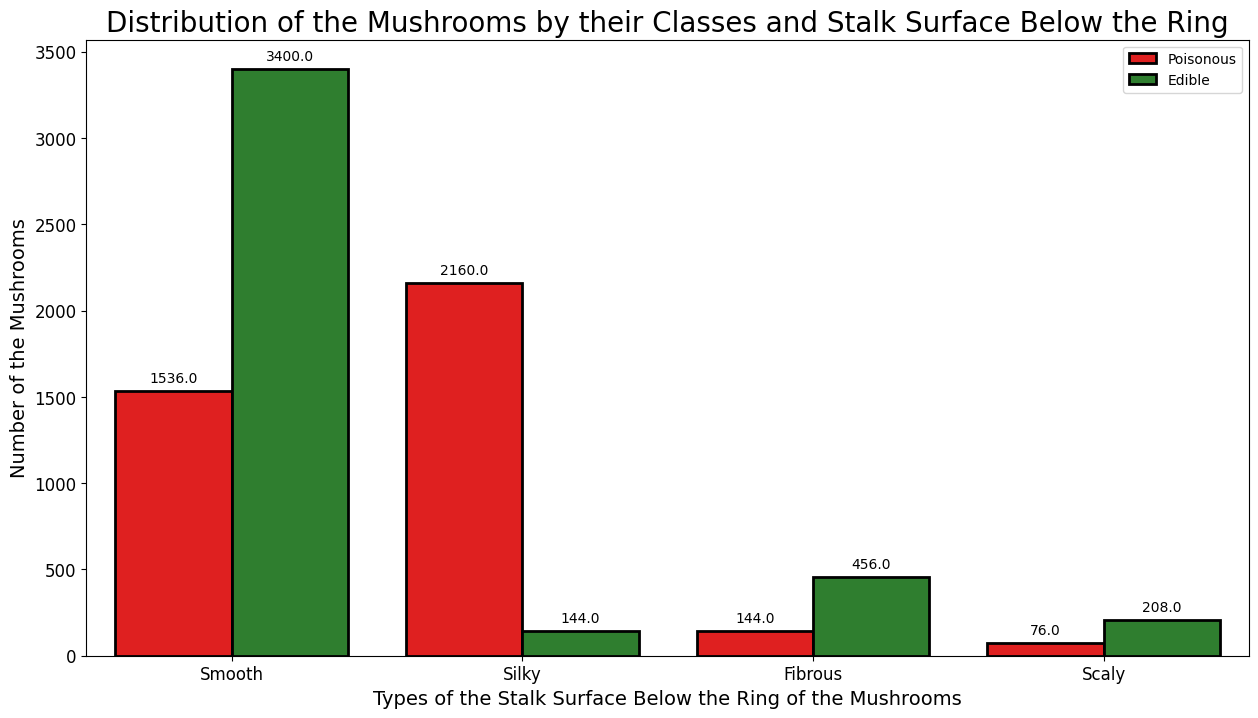

In [127]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='stalk-surface-below-ring',
                      hue='class',
                      order=mushrooms['stalk-surface-below-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surface Below the Ring of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Surface Below the Ring', fontsize=20)

### Veil Types

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Viel Type')

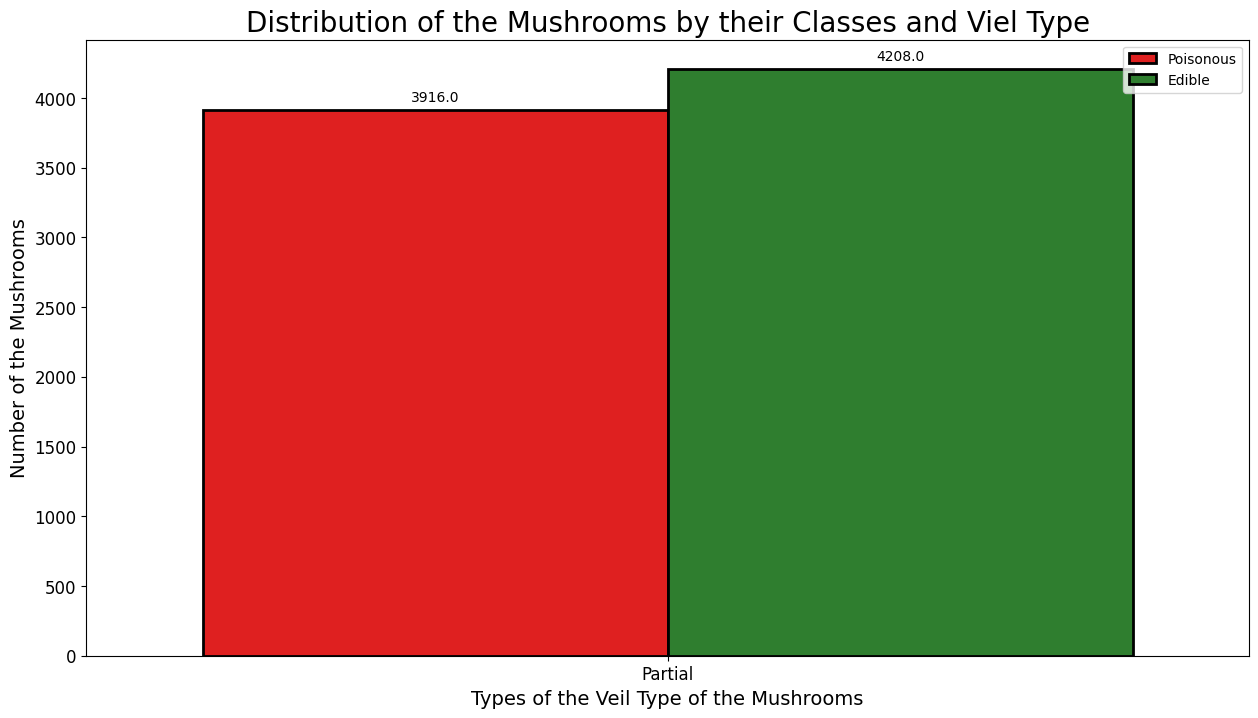

In [128]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='veil-type',
                      hue='class',
                      order=mushrooms['veil-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Partial'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Veil Type of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Viel Type', fontsize=20)

### Veil Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Veil Colors')

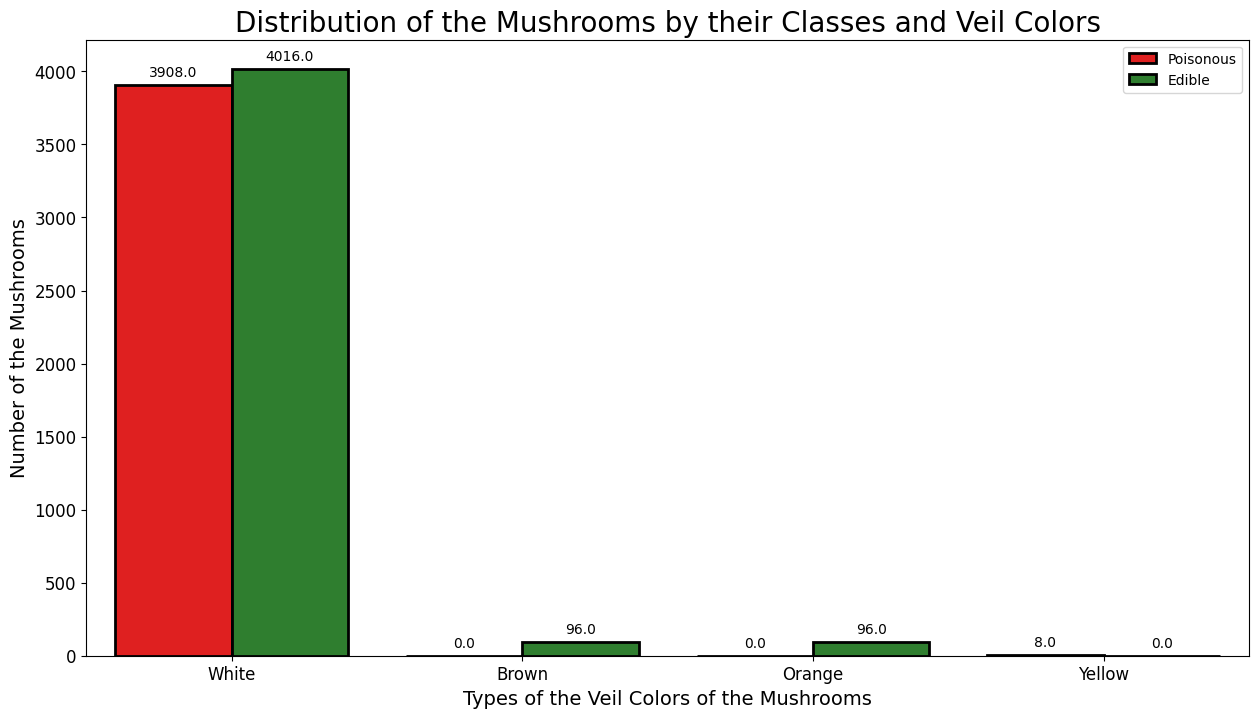

In [129]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='veil-color',
                      hue='class',
                      order=mushrooms['veil-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Veil Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Veil Colors', fontsize=20)

### Number of the Rings

In [130]:
x = ['None', 'One', 'Two']
y = ['Poisonous', 'Edible']
z = [[mushrooms[mushrooms['class'] == 'p']['ring-number'].value_counts()[2],
      mushrooms[mushrooms['class'] == 'p']['ring-number'].value_counts()[0],
      mushrooms[mushrooms['class'] == 'p']['ring-number'].value_counts()[1]],
     [0, mushrooms[mushrooms['class'] == 'e']['ring-number'].value_counts()[0],
      mushrooms[mushrooms['class'] == 'e']['ring-number'].value_counts()[1]]
     ]

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='magma')
fig.update_layout(title_text='Heatmap of the Mushrooms by their Classes vs Number of the Rings',
                  title_x=0.5, title_font=dict(size=22))
fig.update_layout(xaxis=dict(
    tickfont=dict(size=15),
),
    yaxis=dict(tickfont=dict(size=15)))
fig.show()

### Ring Type

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Ring Type')

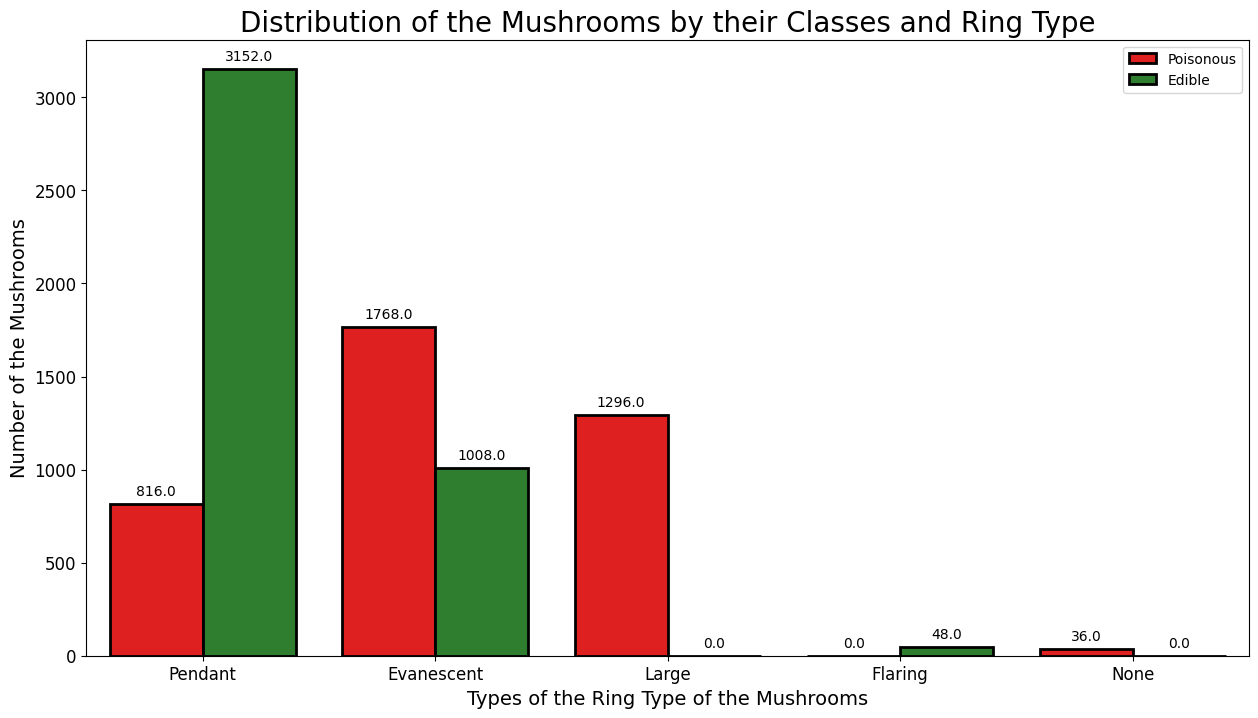

In [131]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='ring-type',
                      hue='class',
                      order=mushrooms['ring-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Ring Type of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Ring Type', fontsize=20)

### Spore Print Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Spore Print Color')

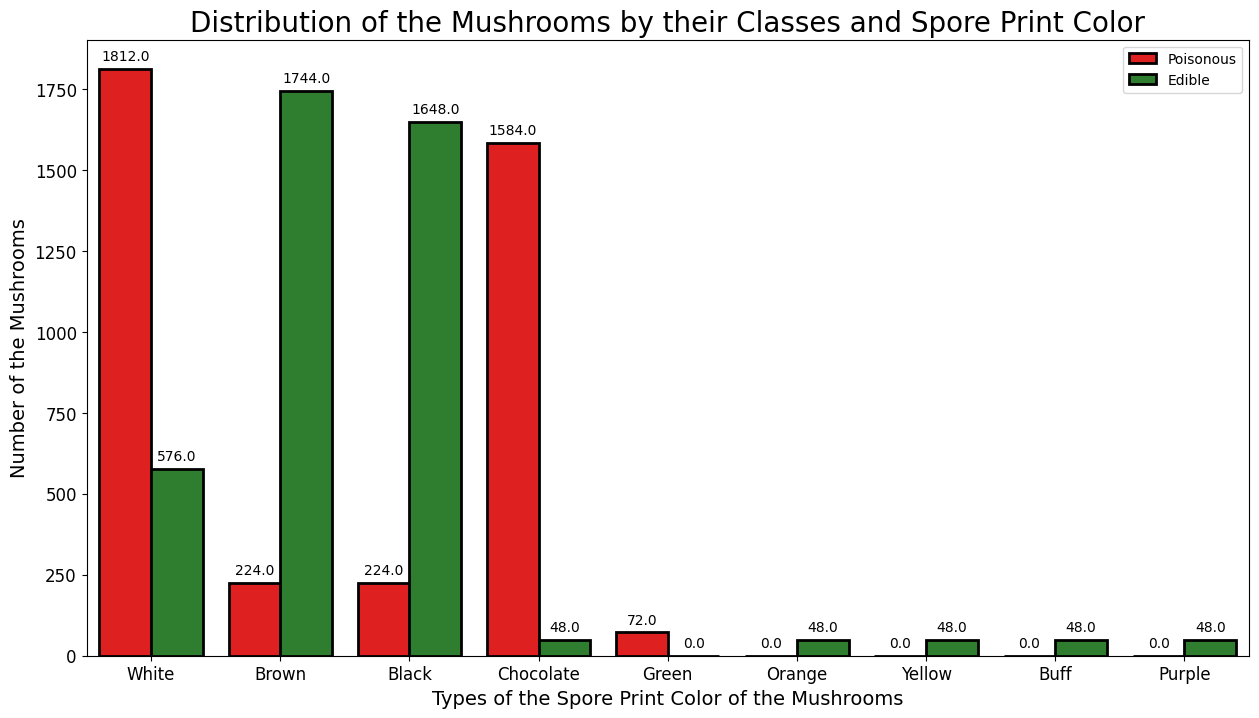

In [132]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='spore-print-color',
                      hue='class',
                      order=mushrooms['spore-print-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Spore Print Color of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Spore Print Color', fontsize=20)

### Population

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Population')

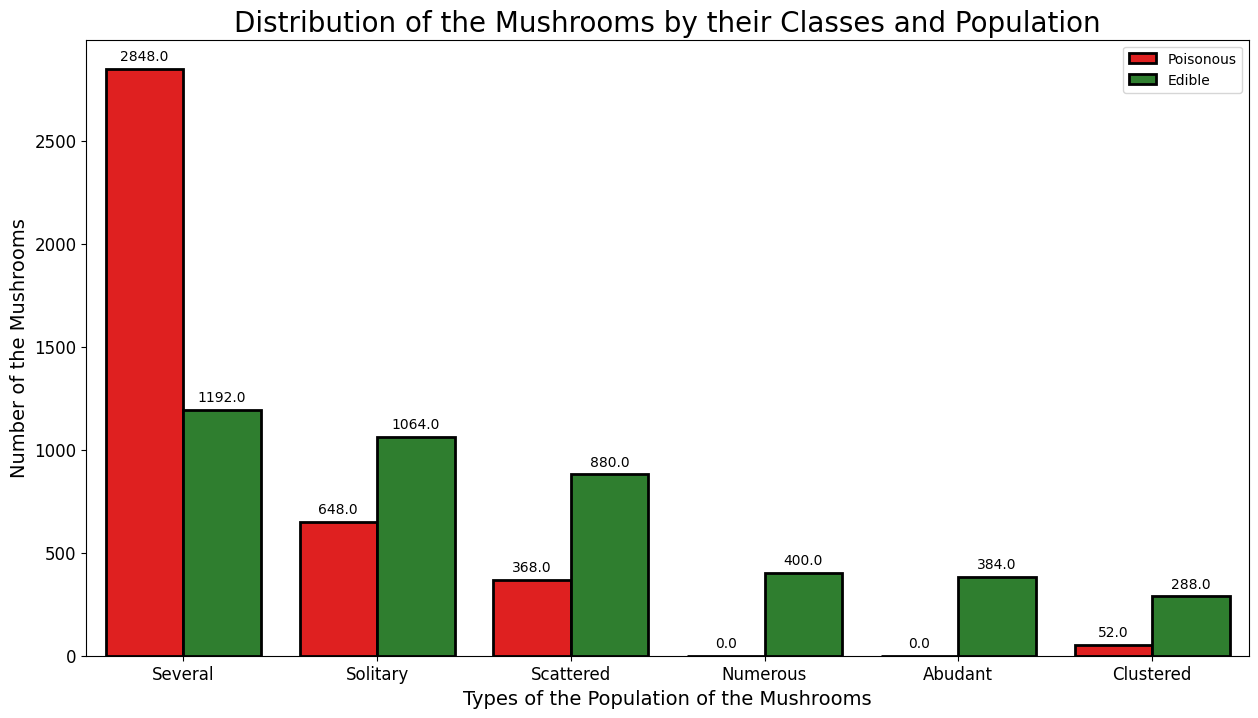

In [133]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='population',
                      hue='class',
                      order=mushrooms['population'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abudant', 'Clustered'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Population of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Population', fontsize=20)

### Habitats

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Habitat')

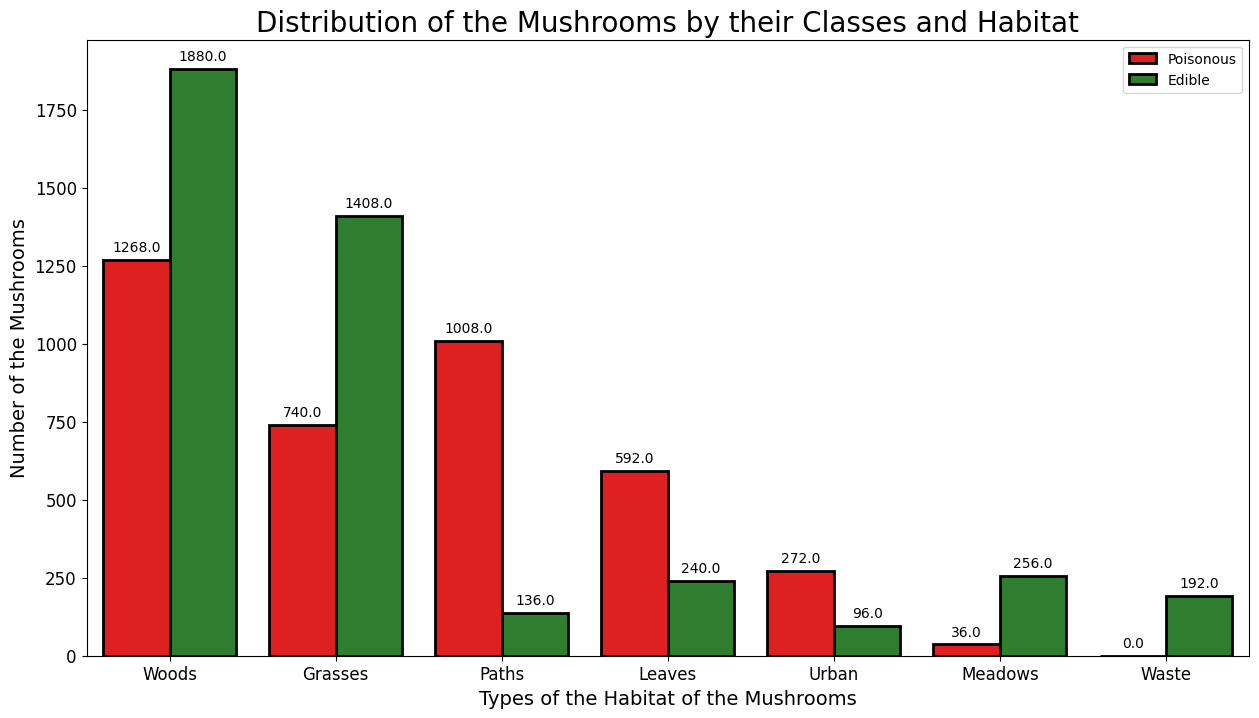

In [134]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='habitat',
                      hue='class',
                      order=mushrooms['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Habitat of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Habitat', fontsize=20)

### Label Encoding

In [135]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])
mushrooms.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [136]:
X_poisonous = mushrooms.iloc[:,1:23]
y_poisonous = mushrooms.iloc[:, 0]

In [137]:
mushrooms['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

### After converting categorical data to numerical data we can see Veil Type is not contributing to the data hence it can be dropped.

In [138]:
mushrooms = mushrooms.drop(["veil-type"],axis=1)

In [139]:
X_temp = mushrooms.iloc[:,1:23]  # all rows, all the features and no labels
y = mushrooms.iloc[:, 0]  # all rows, label only

In [140]:
X_temp.head()

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2                       7   
1                         2                         2                       7   
2                         2                         2                       7   
3                         2                         2                       7   
4                         2                         2                       7   

   stalk-color-below-ring  veil-color  ring-number  ring-type  \
0                       7           2            1          4   
1                       7           2            1          4   
2                       7           2            1          4   
3                       7           2            1          4   
4                       7           2            1          0   

   spore-print-color  population  habitat  
0                  2           3        5  
1                  3           2        1  
2                  3           2        3  
3                  2           3        5  
4                  3           0        1  

[5 rows x 21 columns]

In [141]:
X_temp.describe()

cap-shape  cap-surface    cap-color      bruises         odor  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      3.348104     1.827671     4.504677     0.415559     4.144756   
std       1.604329     1.229873     2.545821     0.492848     2.103729   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     3.000000     0.000000     2.000000   
50%       3.000000     2.000000     4.000000     0.000000     5.000000   
75%       5.000000     3.000000     8.000000     1.000000     5.000000   
max       5.000000     3.000000     9.000000     1.000000     8.000000   

       gill-attachment  gill-spacing    gill-size   gill-color  stalk-shape  \
count      8124.000000   8124.000000  8124.000000  8124.000000  8124.000000   
mean          0.974151      0.161497     0.309207     4.810684     0.567208   
std           0.158695      0.368011     0.462195     3.540359     0.495493   
min           0.000000      0.000000     0.000000     0.000000     0.000000   
25%           1.000000      0.000000     0.000000     2.000000     0.000000   
50%           1.000000      0.000000     0.000000     5.000000     1.000000   
75%           1.000000      0.000000     1.000000     7.000000     1.000000   
max           1.000000      1.000000     1.000000    11.000000     1.000000   

       ...  stalk-surface-above-ring  stalk-surface-below-ring  \
count  ...               8124.000000               8124.000000   
mean   ...                  1.575086                  1.603644   
std    ...                  0.621459                  0.675974   
min    ...                  0.000000                  0.000000   
25%    ...                  1.000000                  1.000000   
50%    ...                  2.000000                  2.000000   
75%    ...                  2.000000                  2.000000   
max    ...                  3.000000                  3.000000   

       stalk-color-above-ring  stalk-color-below-ring   veil-color  \
count             8124.000000             8124.000000  8124.000000   
mean                 5.816347                5.794682     1.965534   
std                  1.901747                1.907291     0.242669   
min                  0.000000                0.000000     0.000000   
25%                  6.000000                6.000000     2.000000   
50%                  7.000000                7.000000     2.000000   
75%                  7.000000                7.000000     2.000000   
max                  8.000000                8.000000     3.000000   

       ring-number    ring-type  spore-print-color   population      habitat  
count  8124.000000  8124.000000        8124.000000  8124.000000  8124.000000  
mean      1.069424     2.291974           3.596750     3.644018     1.508616  
std       0.271064     1.801672           2.382663     1.252082     1.719975  
min       0.000000     0.000000           0.000000     0.000000     0.000000  
25%       1.000000     0.000000           2.000000     3.000000     0.000000  
50%       1.000000     2.000000           3.000000     4.000000     1.000000  
75%       1.000000     4.000000           7.000000     4.000000     2.000000  
max       2.000000     4.000000           8.000000     5.000000     6.000000  

[8 rows x 21 columns]

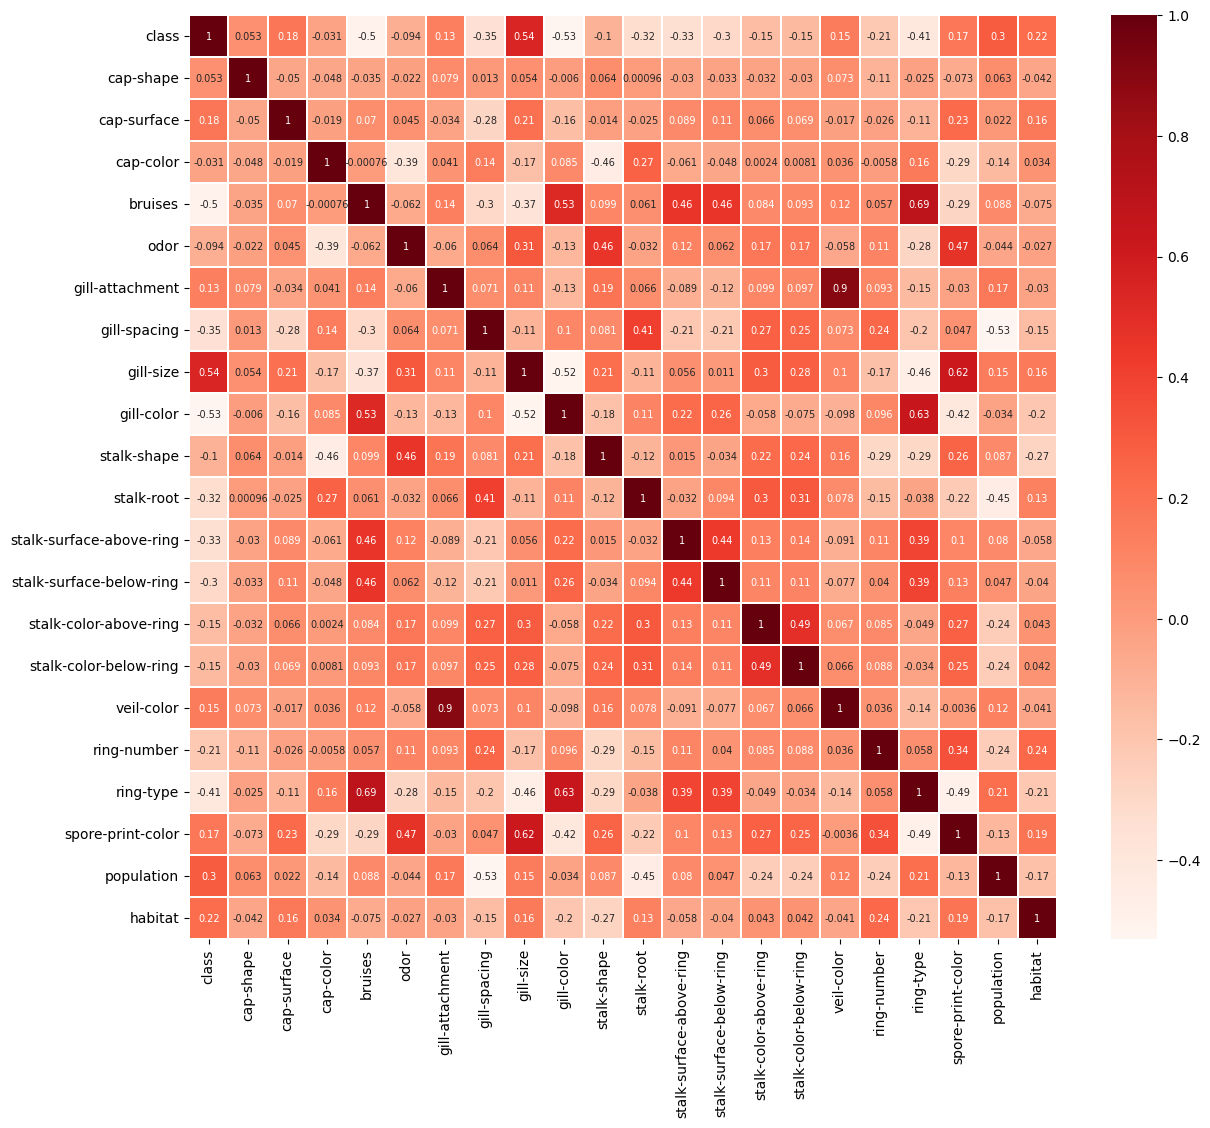

In [142]:
plt.figure(figsize=(14,12))
sns.heatmap(mushrooms.corr(),linewidths=.1,cmap="Reds", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [143]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_temp = scaler.fit_transform(X_temp)

## PCA

In [144]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_temp)

array([[-0.18610098, -0.77703763, -1.69907487, ..., -0.35700792,
        -0.20406451, -0.04734612],
       [-2.02508011,  0.62181546, -1.53586751, ...,  0.27274459,
         0.08487397,  0.25975954],
       [-1.62627309,  0.1449754 , -1.91409692, ...,  0.36520236,
         0.16644317,  0.41202555],
       ...,
       [-2.17638898,  0.28169122,  0.23465684, ...,  0.14183141,
        -1.1267652 , -1.171796  ],
       [ 3.44734958, -1.31499091,  0.3737537 , ...,  0.21633338,
         0.07810751,  0.08121053],
       [-2.15360627, -0.15909805, -0.08184321, ...,  0.88461137,
        -0.59883117, -0.85447968]])

In [145]:
covariance=pca.get_covariance()

In [146]:
explained_variance=pca.explained_variance_
explained_variance

array([3.71048769, 2.58112381, 2.51371449, 2.13503822, 1.70085074,
       1.42385286, 0.97744877, 0.95524955, 0.76965616, 0.73478318,
       0.57747694, 0.54357317, 0.50954191, 0.4780294 , 0.39296205,
       0.31126985, 0.22050035, 0.19387257, 0.13151764, 0.07380577,
       0.06783014])

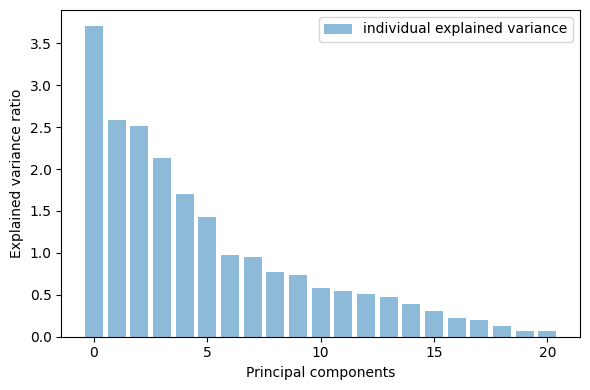

In [147]:
plt.figure(figsize=(6, 4))

plt.bar(range(21), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [148]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score
# Initialize lists to store metrics
train_accuracy_list = []
test_accuracy_list = []
train_f1_list = []
test_f1_list = []
train_auc_list = []
test_auc_list = []

def print_score(classifier, X_train, y_train, X_test, y_test, train=True):
    if train:
        if len(train_accuracy_list) == 6 and len(train_f1_list) == 6 and len(train_auc_list) == 6:
            train_accuracy_list.clear()
            train_f1_list.clear()
            train_auc_list.clear()
        print("Training results:\n")
        y_train_pred = classifier.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print('Accuracy Score: {0:.4f}\n'.format(train_accuracy))
        print('Classification Report:\n{}\n'.format(classification_report(y_train, y_train_pred)))

        # Append train accuracy to the list
        train_accuracy_list.append(train_accuracy)
        # Calculate test F1 score and append it to the list
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        train_f1_list.append(train_f1)


        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))

        # Calculate ROC curve and AUC for training data
        # y_train_prob = classifier.predict_proba(X_train)[:, 1]
        # y_train_pred = np.where(y_train_prob > 0.5, 1, 0)
        auc_roc_train = roc_auc_score(y_train, y_train_pred)
        train_auc_list.append(auc_roc_train)
        print('ROC AUC Score:\t{0:.4f}\n'.format(auc_roc_train))

        false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_train_pred)
        roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)

        print("Confusion Matrix:\n")
        cm = confusion_matrix(y_train, y_train_pred)
        x_axis_labels = ["Edible", "Poisonous"]
        y_axis_labels = ["Edible", "Poisonous"]
        f, ax = plt.subplots(figsize =(3,3))
        sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
        plt.xlabel("PREDICTED LABEL")
        plt.ylabel("TRUE LABEL")
        plt.title('Confusion Matrix for {}'.format(classifier))
        #plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
        plt.show()

        # Plot ROC curve for training data
        plt.figure(figsize=(3, 3))
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive_rate_train, true_positive_rate_train, color='red', label='AUC = %0.2f' % roc_auc_train)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

    else:
        if len(test_accuracy_list) == 6 and len(test_f1_list) == 6 and len(test_auc_list) == 6:
            test_accuracy_list.clear()
            test_f1_list.clear()
            test_auc_list.clear()
        print("Test results:\n")
        y_test_pred = classifier.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print('Accuracy Score: {0:.4f}\n'.format(test_accuracy))
        print('Classification Report:\n{}\n'.format(classification_report(y_test, y_test_pred)))

        # Append test accuracy to the list
        test_accuracy_list.append(test_accuracy)

        # Calculate test F1 score and append it to the list
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        test_f1_list.append(test_f1)

        # Calculate ROC curve and AUC for test data
        # y_test_prob = classifier.predict_proba(X_test)[:, 1]
        # y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
        auc_roc_test=roc_auc_score(y_test,y_test_pred)
        test_auc_list.append(auc_roc_test)
        print('ROC AUC Score:\t{0:.4f}\n'.format(auc_roc_test))
        false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
        roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)

        print("Confusion Matrix:\n")
        cm = confusion_matrix(y_test,classifier.predict(X_test))
        x_axis_labels = ["Edible", "Poisonous"]
        y_axis_labels = ["Edible", "Poisonous"]
        f, ax = plt.subplots(figsize =(3,3))
        sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
        plt.xlabel("PREDICTED LABEL")
        plt.ylabel("TRUE LABEL")
        plt.title('Confusion Matrix for {}'.format(classifier))
        #plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
        plt.show()

        # Plot ROC curve for test data
        plt.figure(figsize=(3,3))
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive_rate_test,true_positive_rate_test, color='red',label = 'AUC = %0.2f' % roc_auc_test)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

    return train_accuracy_list, test_accuracy_list, train_f1_list, test_f1_list, train_auc_list, test_auc_list

def auc_ann(classifier, X_train, y_train, X_test, y_test, train=True):
    if train:
        y_train_pred = classifier.predict(X_train)
        # Calculate ROC curve and AUC for training data
        auc_roc_train = roc_auc_score(y_train, y_train_pred)
        print('ROC AUC Score:\t{0:.4f}\n'.format(auc_roc_train))

        false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_train_pred)
        roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)

        # Plot ROC curve for training data
        plt.figure(figsize=(3, 3))
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive_rate_train, true_positive_rate_train, color='red', label='AUC = %0.2f' % roc_auc_train)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        return auc_roc_train

    else:
        y_test_pred = classifier.predict(X_test)

        # Calculate ROC curve and AUC for test data
        auc_roc_test=roc_auc_score(y_test,y_test_pred)
        print('ROC AUC Score:\t{0:.4f}\n'.format(auc_roc_test))
        false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
        roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)

        # Plot ROC curve for test data
        plt.figure(figsize=(3,3))
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive_rate_test,true_positive_rate_test, color='red',label = 'AUC = %0.2f' % roc_auc_test)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        return auc_roc_test

In [149]:
# Plot loss function

def plotter(tr_model):
  plt.plot(tr_model.history['accuracy'], color = "blue", label = "train")
  plt.plot(tr_model.history['val_accuracy'], color = "red", label = "validation")

  plt.title("Learning curves")
  plt.ylabel("Accuracy")
  plt.xlabel("Number of epochs")
  plt.grid()
  plt.legend()
  plt.show()

In [150]:
# Create a function which takes a model and prints various evaluation metrics

import seaborn as sns
from sklearn import metrics

def evaluate(mlp, titlemsg):

  print("Confusion Matrix:\n")
  y_predicted = mlp.predict(X_test)
  y_predicted = y_predicted > 0.5
  f1 = f1_score(y_test, y_predicted, average='weighted')
  test_f1.append(f1)
  train_f1.append(0)
  mat = metrics.confusion_matrix(y_test, y_predicted)
  x_axis_labels = ["Edible", "Poisonous"]
  y_axis_labels = ["Edible", "Poisonous"]
  f, ax = plt.subplots(figsize =(3,3))
  sns.heatmap(mat, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("PREDICTED LABEL")
  plt.ylabel("TRUE LABEL")
  plt.title('Confusion Matrix for {}'.format(titlemsg))
  plt.show()

### N = 7

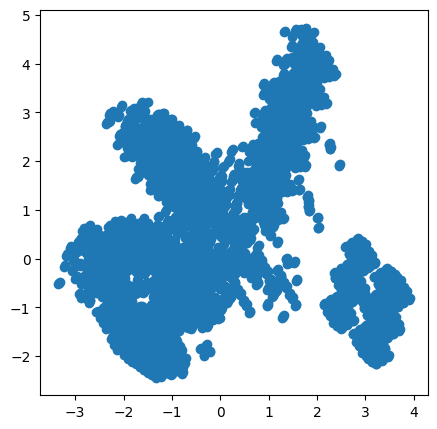

In [151]:
pca = PCA(n_components=7)
x = pca.fit_transform(X_temp)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

### Split Data

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x,y,test_size=0.4,random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state = 1)

### Logistic Regression

Training results:

Accuracy Score: 0.9032

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2478
           1       0.94      0.86      0.90      2396

    accuracy                           0.90      4874
   macro avg       0.91      0.90      0.90      4874
weighted avg       0.91      0.90      0.90      4874


Average Accuracy:	0.9023

Standard Deviation:	0.0196
ROC AUC Score:	0.9025

Confusion Matrix:



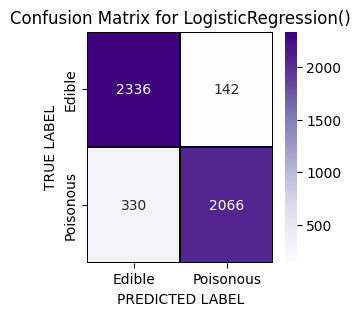

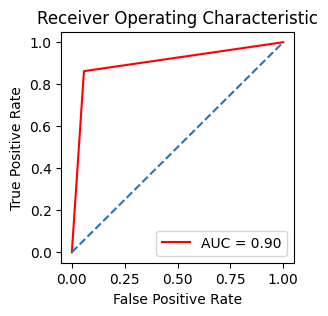

In [153]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.8914

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1730
           1       0.92      0.84      0.88      1520

    accuracy                           0.89      3250
   macro avg       0.90      0.89      0.89      3250
weighted avg       0.89      0.89      0.89      3250


ROC AUC Score:	0.8880

Confusion Matrix:



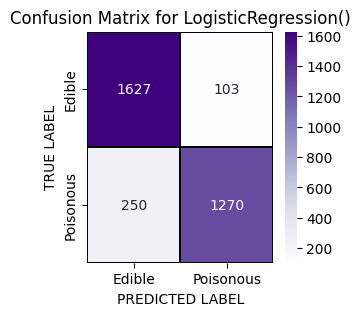

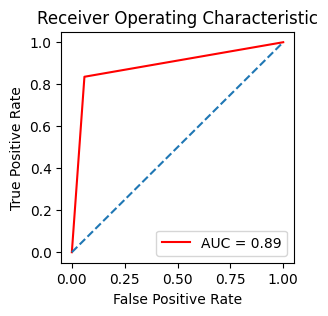

In [154]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc  = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### ANN

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 32        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
488/488 [==============================] - 3s 4ms/step - loss: 0.4228 - accuracy: 0.8342 - val_loss: 0.3192 - val_accuracy: 0.8757
Epoch 2/25
488/488 [==============================] - 1s 2ms/step - loss: 0.2765 - accuracy: 0.8906 - val_loss: 0.2610 - val_accuracy: 0.8892
Epoch 3/25
488/488 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.9023 - val_loss: 0.2446 - val_accuracy: 0.8948
Epoch 4/25
488/488 [========

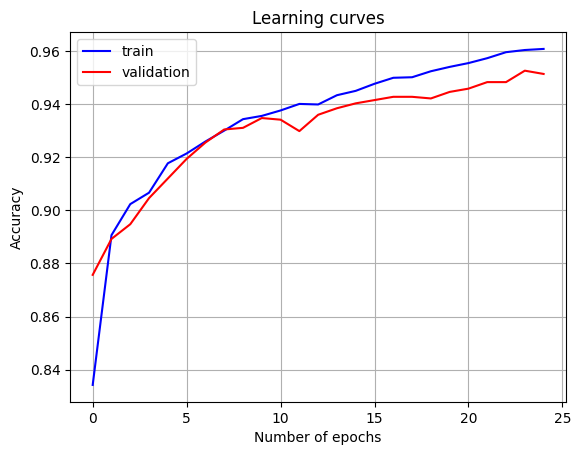

In [155]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
classifier = Sequential()
import time

model = Sequential()

model.add(Dense(4, activation = 'relu', input_dim = X_train.shape[1]))
# model.add(Dense(8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
start = time.time()
trained_model = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val), batch_size = 10, verbose=1)
end = time.time()
num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")
plotter(trained_model)

Test loss: 0.1307
Test accuracy: 94.52
102/102 [==============================] - 0s 1ms/step
ROC AUC Score:	0.9899



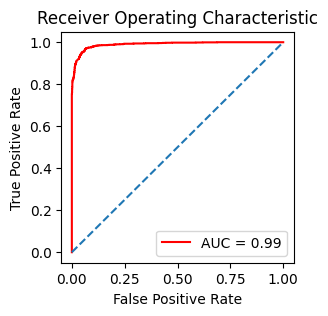

In [156]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))
train_accuracy.append(0)
test_accuracy.append(score[1])
train_auc.append(0)
auc_val = auc_ann(model, X_train, y_train, X_rem, y_rem, train=False)
test_auc.append(auc_val)

Confusion Matrix:

51/51 [==============================] - 0s 2ms/step


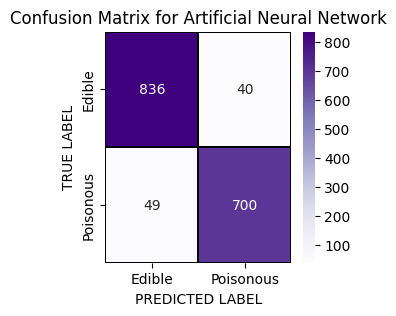

In [157]:
evaluate(model, "Artificial Neural Network")

### K Nearest Mean

Training results:

Accuracy Score: 0.9984

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Average Accuracy:	0.9967

Standard Deviation:	0.0023
ROC AUC Score:	0.9983

Confusion Matrix:



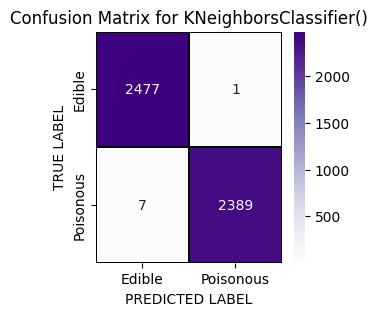

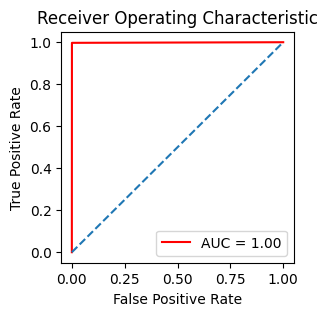

In [158]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9957

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1730
           1       1.00      0.99      1.00      1520

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250


ROC AUC Score:	0.9955

Confusion Matrix:



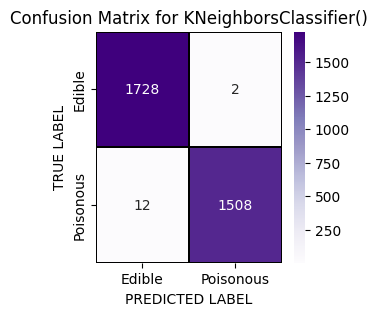

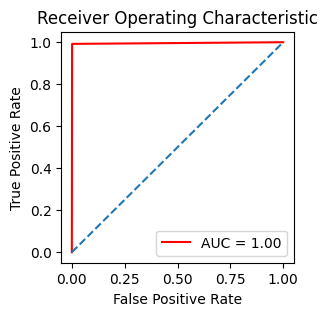

In [159]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Decision Tree

Training results:

Accuracy Score: 0.9852

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2478
           1       0.98      0.99      0.99      2396

    accuracy                           0.99      4874
   macro avg       0.99      0.99      0.99      4874
weighted avg       0.99      0.99      0.99      4874


Average Accuracy:	0.9723

Standard Deviation:	0.0082
ROC AUC Score:	0.9853

Confusion Matrix:



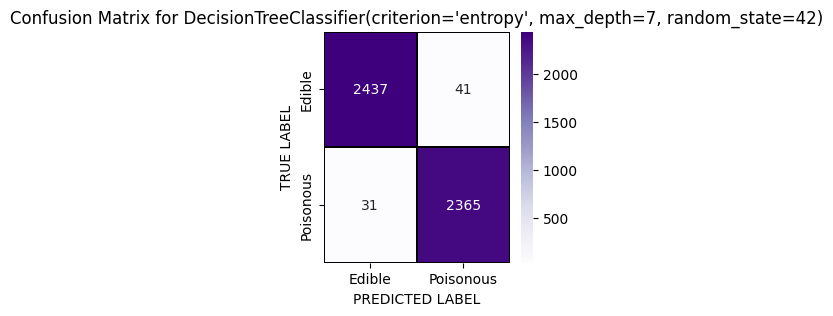

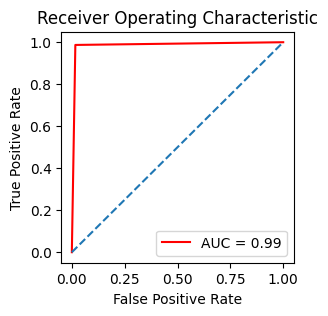

In [160]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy', max_depth = 7, random_state=42)
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9738

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1730
           1       0.96      0.98      0.97      1520

    accuracy                           0.97      3250
   macro avg       0.97      0.97      0.97      3250
weighted avg       0.97      0.97      0.97      3250


ROC AUC Score:	0.9744

Confusion Matrix:



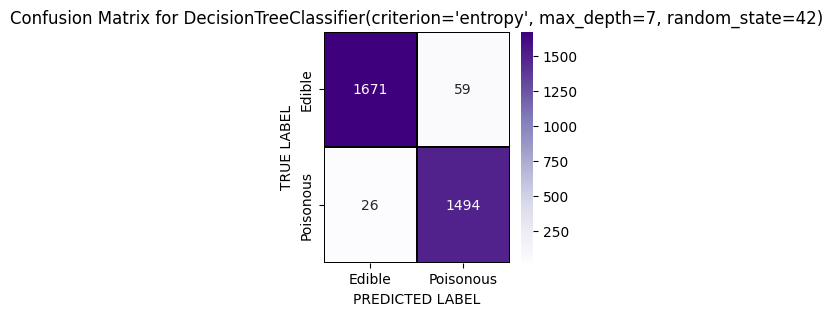

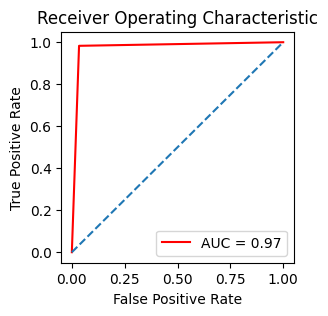

In [161]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Naive Bayes

Training results:

Accuracy Score: 0.8884

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2478
           1       0.89      0.88      0.89      2396

    accuracy                           0.89      4874
   macro avg       0.89      0.89      0.89      4874
weighted avg       0.89      0.89      0.89      4874


Average Accuracy:	0.8872

Standard Deviation:	0.0156
ROC AUC Score:	0.8882

Confusion Matrix:



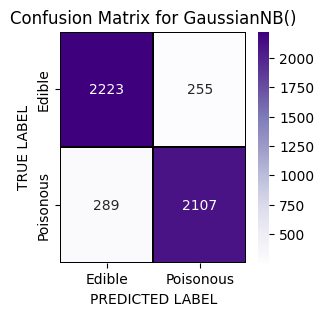

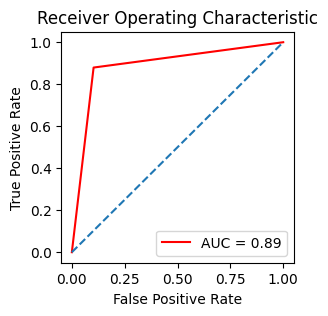

In [162]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.8834

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1730
           1       0.90      0.85      0.87      1520

    accuracy                           0.88      3250
   macro avg       0.88      0.88      0.88      3250
weighted avg       0.88      0.88      0.88      3250


ROC AUC Score:	0.8812

Confusion Matrix:



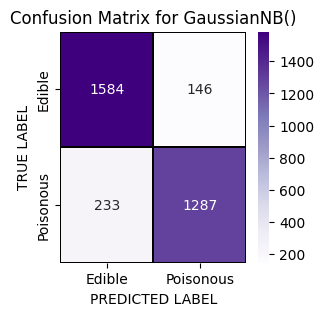

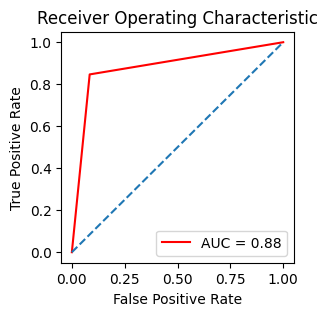

In [163]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Random Forest

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Average Accuracy:	0.9984

Standard Deviation:	0.0018
ROC AUC Score:	1.0000

Confusion Matrix:



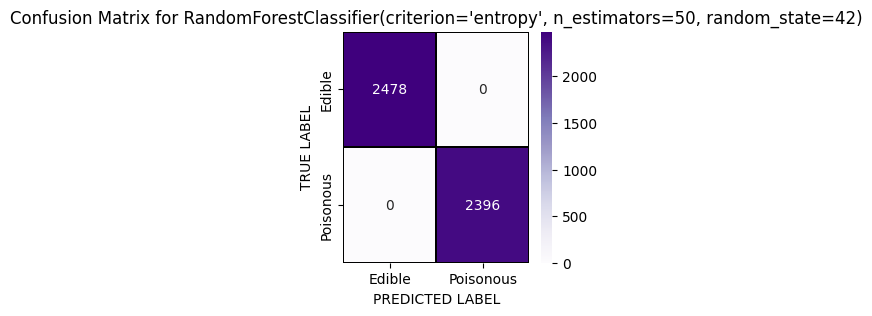

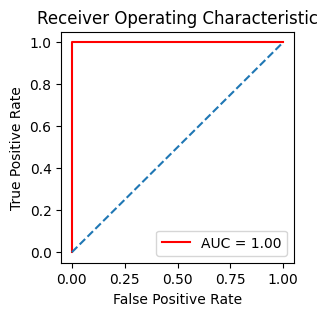

In [164]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9982

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1730
           1       1.00      1.00      1.00      1520

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250


ROC AUC Score:	0.9980

Confusion Matrix:



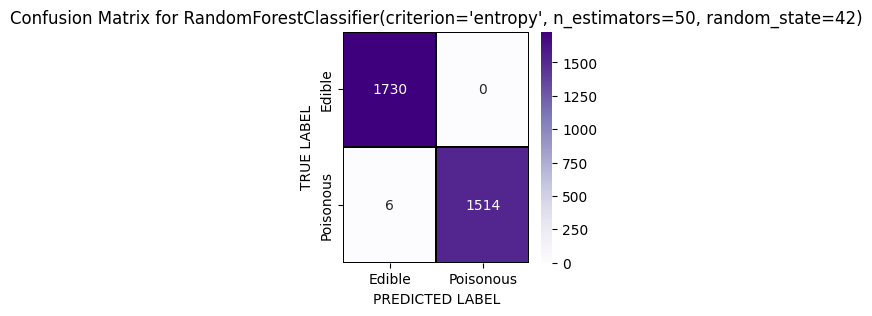

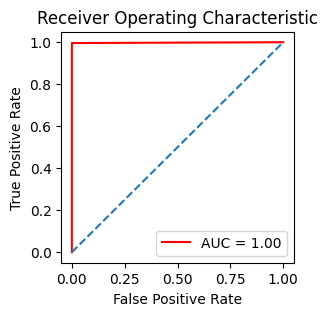

In [165]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

In [166]:
print(train_accuracy)
print(test_accuracy)
print(train_f1)
print(test_f1)
print(train_auc)
print(test_auc)

[0.9031596224866639, 0, 0.9983586376692655, 0.9852277390233894, 0.8883873615100534, 1.0]
[0.8913846153846153, 0.9452307820320129, 0.9956923076923077, 0.9738461538461538, 0.8833846153846154, 0.9981538461538462]
[0.9029520633706737, 0, 0.998358601176319, 0.9852281868430953, 0.8883688208454452, 1.0]
[0.8908383768689404, 0.945205203158901, 0.9956914063385943, 0.9738606597938196, 0.8830969372092546, 0.9981536186290383]
[0.9024830865539956, 0, 0.9983374564279178, 0.9852580841623313, 0.8882383674162345, 1.0]
[0.8879943717675692, 0.9899015059324612, 0.9954745968968663, 0.9743953452996653, 0.8811587313659872, 0.9980263157894738]


In [167]:
final_train_accuracy = []
final_test_accuracy = []
final_train_f1 = []
final_test_f1 = []
final_train_auc = []
final_test_auc = []

In [168]:
import copy
final_train_accuracy.append(copy.deepcopy(train_accuracy))
final_test_accuracy.append(copy.deepcopy(test_accuracy))
final_train_f1.append(copy.deepcopy(train_f1))
final_test_f1.append(copy.deepcopy(test_f1))
final_train_auc.append(copy.deepcopy(train_auc))
final_test_auc.append(copy.deepcopy(test_auc))

print(final_train_accuracy)
print(final_test_accuracy)
print(final_train_f1)
print(final_test_f1)
print(final_train_auc)
print(final_test_auc)

[[0.9031596224866639, 0, 0.9983586376692655, 0.9852277390233894, 0.8883873615100534, 1.0]]
[[0.8913846153846153, 0.9452307820320129, 0.9956923076923077, 0.9738461538461538, 0.8833846153846154, 0.9981538461538462]]
[[0.9029520633706737, 0, 0.998358601176319, 0.9852281868430953, 0.8883688208454452, 1.0]]
[[0.8908383768689404, 0.945205203158901, 0.9956914063385943, 0.9738606597938196, 0.8830969372092546, 0.9981536186290383]]
[[0.9024830865539956, 0, 0.9983374564279178, 0.9852580841623313, 0.8882383674162345, 1.0]]
[[0.8879943717675692, 0.9899015059324612, 0.9954745968968663, 0.9743953452996653, 0.8811587313659872, 0.9980263157894738]]


### N = 12

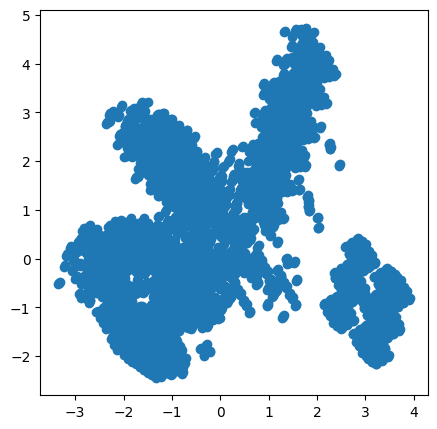

In [169]:
pca = PCA(n_components=12)
x = pca.fit_transform(X_temp)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

### Split Data

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x,y,test_size=0.4,random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state = 1)

### Logistic Regression

Training results:

Accuracy Score: 0.9149

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2478
           1       0.94      0.88      0.91      2396

    accuracy                           0.91      4874
   macro avg       0.92      0.91      0.91      4874
weighted avg       0.92      0.91      0.91      4874


Average Accuracy:	0.9136

Standard Deviation:	0.0122
ROC AUC Score:	0.9143

Confusion Matrix:



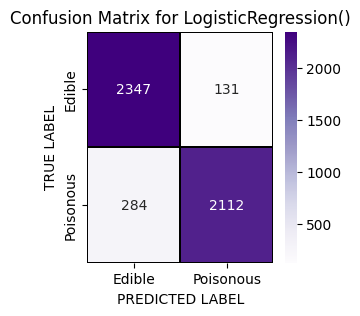

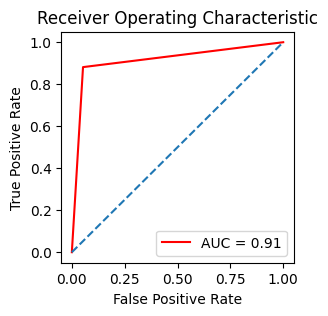

In [171]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9049

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1730
           1       0.93      0.86      0.89      1520

    accuracy                           0.90      3250
   macro avg       0.91      0.90      0.90      3250
weighted avg       0.91      0.90      0.90      3250


ROC AUC Score:	0.9021

Confusion Matrix:



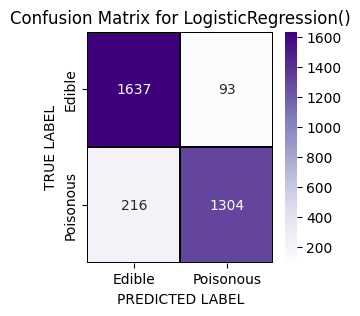

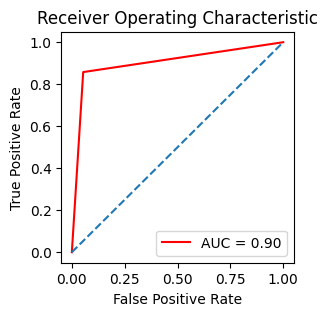

In [172]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### ANN

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 52        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
488/488 [==============================] - 2s 3ms/step - loss: 0.6185 - accuracy: 0.7275 - val_loss: 0.4489 - val_accuracy: 0.8806
Epoch 2/25
488/488 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.9138 - val_loss: 0.2945 - val_accuracy: 0.9274
Epoch 3/25
488/488 [==============================] - 1s 3ms/step - loss: 0.2605 - accuracy: 0.9348 - val_loss: 0.2386 - val_accuracy: 0.9385
Epoch 4/25
488/488 [========

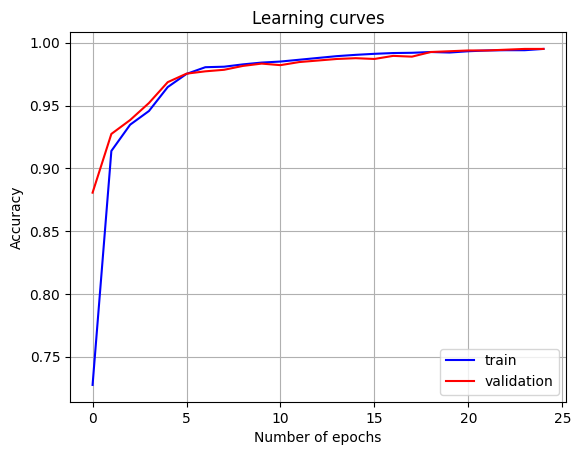

In [173]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
classifier = Sequential()
import time

model = Sequential()

model.add(Dense(4, activation = 'relu', input_dim = X_train.shape[1]))
# model.add(Dense(8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
start = time.time()
trained_model = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val), batch_size = 10, verbose=1)
end = time.time()
num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")
plotter(trained_model)

Test loss: 0.0265
Test accuracy: 99.08
102/102 [==============================] - 1s 6ms/step
ROC AUC Score:	0.9999



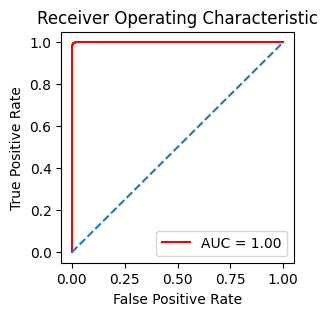

In [174]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))
train_accuracy.append(0)
test_accuracy.append(score[1])
train_auc.append(0)
auc_val = auc_ann(model, X_train, y_train, X_rem, y_rem, train=False)
test_auc.append(auc_val)

Confusion Matrix:

51/51 [==============================] - 0s 1ms/step


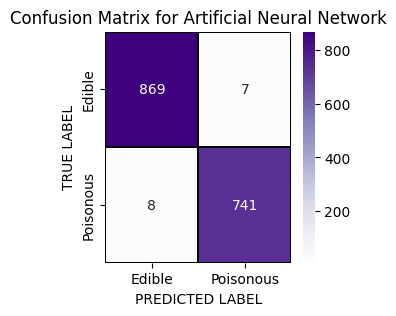

In [175]:
# Create a function which takes a model and prints various evaluation metrics
evaluate(model, "Artificial Neural Network")

### K Nearest Mean

Training results:

Accuracy Score: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Average Accuracy:	0.9988

Standard Deviation:	0.0014
ROC AUC Score:	0.9992

Confusion Matrix:



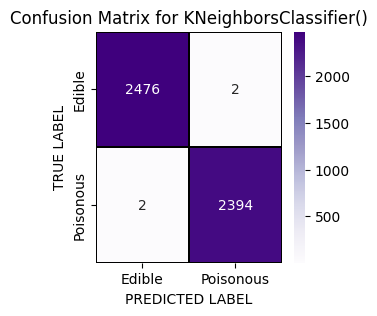

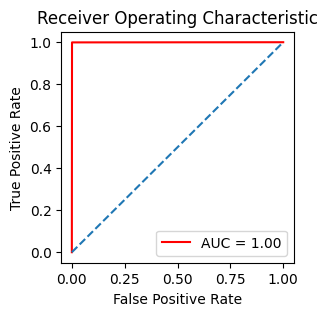

In [176]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9988

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1730
           1       1.00      1.00      1.00      1520

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250


ROC AUC Score:	0.9987

Confusion Matrix:



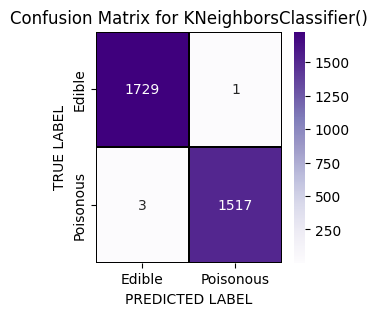

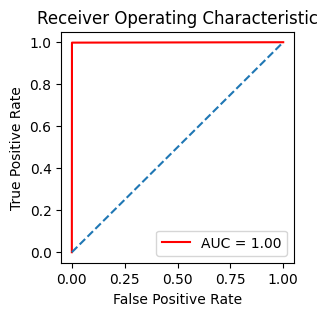

In [177]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Decision Tree

Training results:

Accuracy Score: 0.9885

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2478
           1       0.98      1.00      0.99      2396

    accuracy                           0.99      4874
   macro avg       0.99      0.99      0.99      4874
weighted avg       0.99      0.99      0.99      4874


Average Accuracy:	0.9723

Standard Deviation:	0.0122
ROC AUC Score:	0.9886

Confusion Matrix:



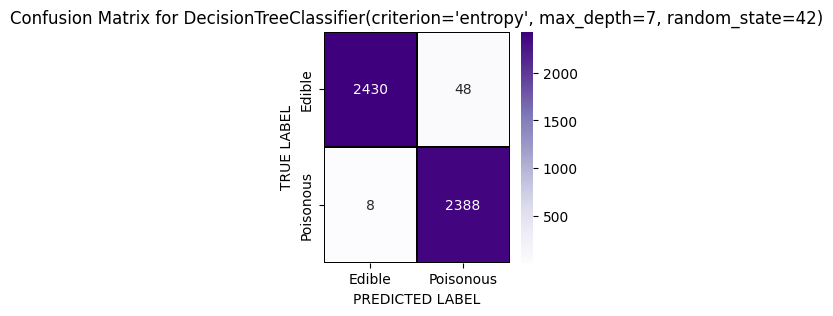

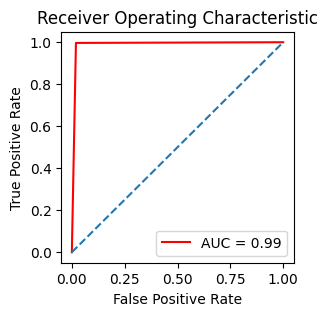

In [178]:
from sklearn.tree import DecisionTreeClassifier as DT, export_graphviz

classifier = DT(criterion='entropy', max_depth=7, random_state=42)
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9837

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1730
           1       0.97      0.99      0.98      1520

    accuracy                           0.98      3250
   macro avg       0.98      0.98      0.98      3250
weighted avg       0.98      0.98      0.98      3250


ROC AUC Score:	0.9843

Confusion Matrix:



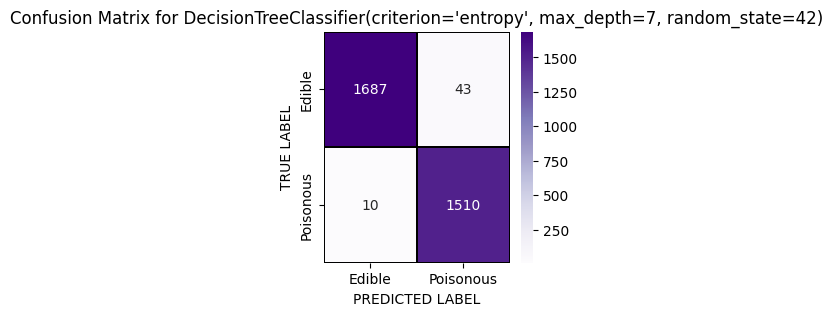

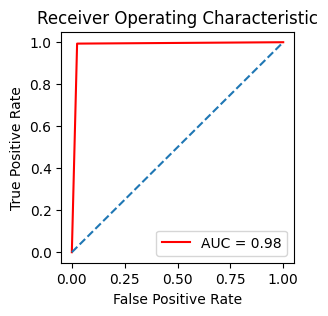

In [179]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Naive Bayes

Training results:

Accuracy Score: 0.9343

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2478
           1       0.96      0.91      0.93      2396

    accuracy                           0.93      4874
   macro avg       0.94      0.93      0.93      4874
weighted avg       0.94      0.93      0.93      4874


Average Accuracy:	0.9329

Standard Deviation:	0.0114
ROC AUC Score:	0.9339

Confusion Matrix:



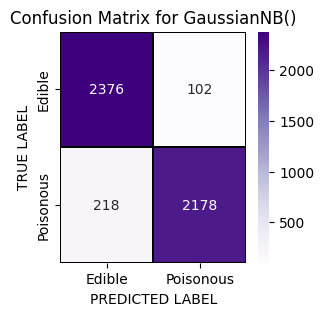

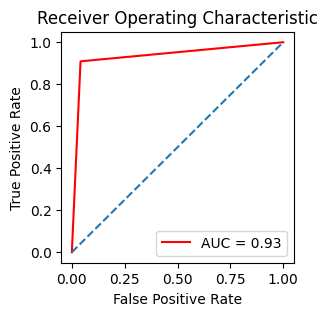

In [180]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9215

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1730
           1       0.95      0.88      0.91      1520

    accuracy                           0.92      3250
   macro avg       0.92      0.92      0.92      3250
weighted avg       0.92      0.92      0.92      3250


ROC AUC Score:	0.9190

Confusion Matrix:



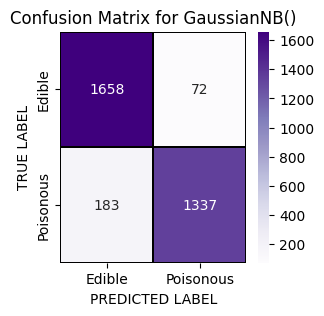

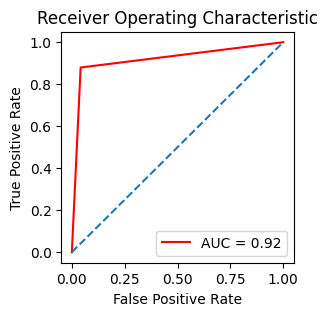

In [181]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Random Forest

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Average Accuracy:	0.9998

Standard Deviation:	0.0006
ROC AUC Score:	1.0000

Confusion Matrix:



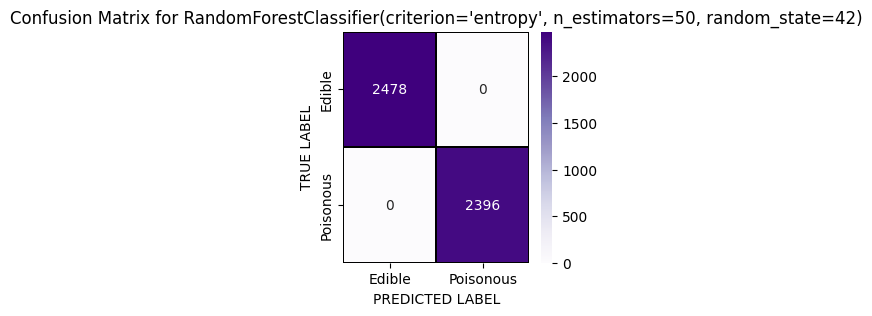

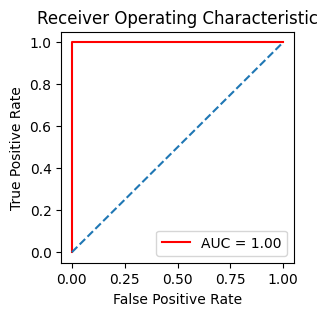

In [182]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1730
           1       1.00      1.00      1.00      1520

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250


ROC AUC Score:	1.0000

Confusion Matrix:



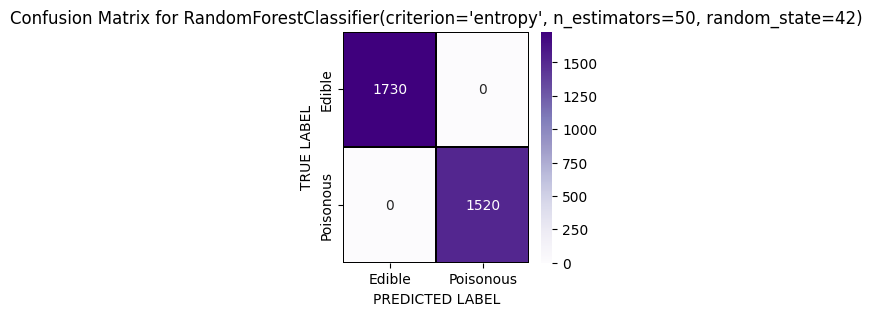

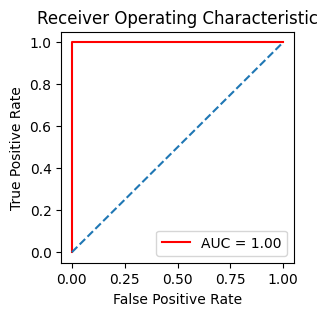

In [183]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

In [184]:
import copy
final_train_accuracy.append(copy.deepcopy(train_accuracy))
final_test_accuracy.append(copy.deepcopy(test_accuracy))
final_train_f1.append(copy.deepcopy(train_f1))
final_test_f1.append(copy.deepcopy(test_f1))
final_train_auc.append(copy.deepcopy(train_auc))
final_test_auc.append(copy.deepcopy(test_auc))

print(final_train_accuracy)
print(final_test_accuracy)
print(final_train_f1)
print(final_test_f1)
print(final_train_auc)
print(final_test_auc)

[[0.9031596224866639, 0, 0.9983586376692655, 0.9852277390233894, 0.8883873615100534, 1.0], [0.9148543290931473, 0, 0.9991793188346327, 0.9885104636848584, 0.9343455067706196, 1.0]]
[[0.8913846153846153, 0.9452307820320129, 0.9956923076923077, 0.9738461538461538, 0.8833846153846154, 0.9981538461538462], [0.9049230769230769, 0.9907692074775696, 0.9987692307692307, 0.9836923076923076, 0.9215384615384615, 1.0]]
[[0.9029520633706737, 0, 0.998358601176319, 0.9852281868430953, 0.8883688208454452, 1.0], [0.9147251591139153, 0, 0.9991793188346327, 0.988511276277685, 0.934281924814412, 1.0]]
[[0.8908383768689404, 0.945205203158901, 0.9956914063385943, 0.9738606597938196, 0.8830969372092546, 0.9981536186290383], [0.9045504783167657, 0.990768780529157, 0.9987691811525561, 0.9837013525773228, 0.9212711759095468, 1.0]]
[[0.9024830865539956, 0, 0.9983374564279178, 0.9852580841623313, 0.8882383674162345, 1.0], [0.9143019506549118, 0, 0.9991790864785404, 0.9886453208939839, 0.9339263987194154, 1.0]]
[[

### N = 17

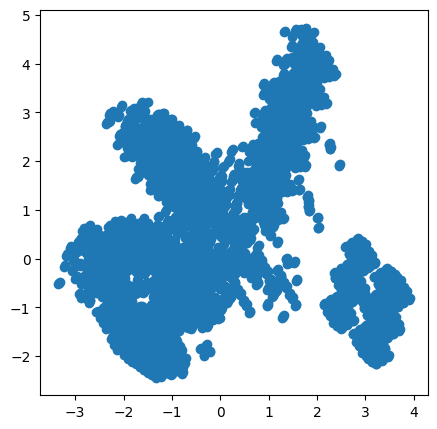

In [185]:
# N=X_temp.values
pca = PCA(n_components=17)
x = pca.fit_transform(X_temp)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

### Split Data

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x,y,test_size=0.4,random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state = 1)

### Logistic Regression

Training results:

Accuracy Score: 0.9653

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2478
           1       0.97      0.96      0.96      2396

    accuracy                           0.97      4874
   macro avg       0.97      0.97      0.97      4874
weighted avg       0.97      0.97      0.97      4874


Average Accuracy:	0.9625

Standard Deviation:	0.0059
ROC AUC Score:	0.9652

Confusion Matrix:



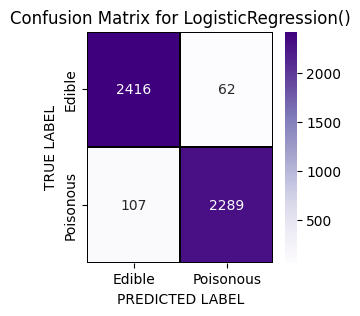

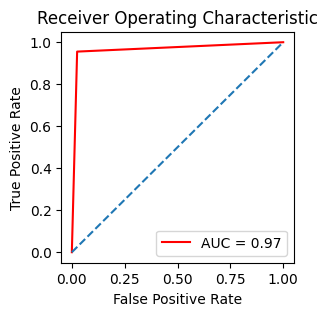

In [187]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9551

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1730
           1       0.97      0.93      0.95      1520

    accuracy                           0.96      3250
   macro avg       0.96      0.95      0.95      3250
weighted avg       0.96      0.96      0.96      3250


ROC AUC Score:	0.9537

Confusion Matrix:



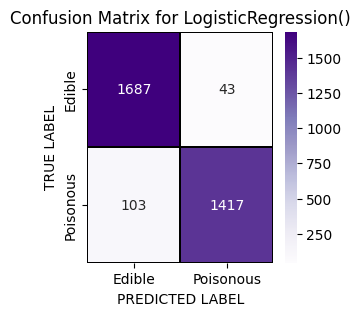

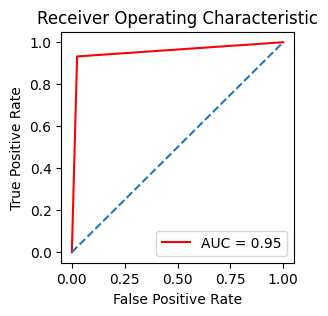

In [188]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### ANN

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
488/488 [==============================] - 2s 3ms/step - loss: 0.4186 - accuracy: 0.8430 - val_loss: 0.3096 - val_accuracy: 0.9028
Epoch 2/25
488/488 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.9350 - val_loss: 0.2285 - val_accuracy: 0.9446
Epoch 3/25
488/488 [==============================] - 1s 3ms/step - loss: 0.2010 - accuracy: 0.9579 - val_loss: 0.1809 - val_accuracy: 0.9606
Epoch 4/25
488/488 [=======

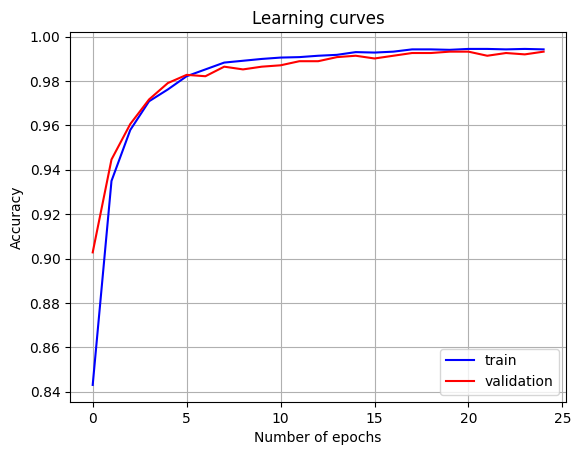

In [189]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
classifier = Sequential()
import time

model = Sequential()

model.add(Dense(4, activation = 'relu', input_dim = X_train.shape[1]))
# model.add(Dense(8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
start = time.time()
trained_model = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val), batch_size = 10, verbose=1)
end = time.time()
num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")
plotter(trained_model)

Test loss: 0.0418
Test accuracy: 98.95
102/102 [==============================] - 0s 1ms/step
ROC AUC Score:	0.9965



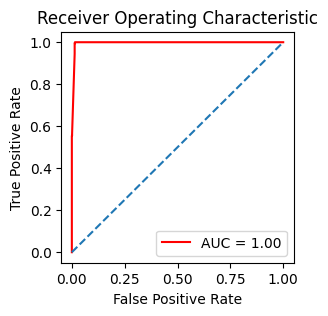

In [190]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))
train_accuracy.append(0)
test_accuracy.append(score[1])
train_auc.append(0)
auc_val = auc_ann(model, X_train, y_train, X_rem, y_rem, train=False)
test_auc.append(auc_val)

Confusion Matrix:

51/51 [==============================] - 0s 1ms/step


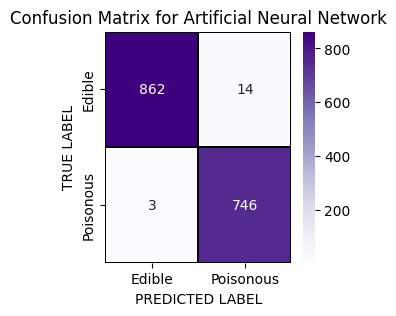

In [191]:
evaluate(model, "Artificial Neural Network")

### K Nearest Means

Training results:

Accuracy Score: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Average Accuracy:	0.9994

Standard Deviation:	0.0013
ROC AUC Score:	0.9998

Confusion Matrix:



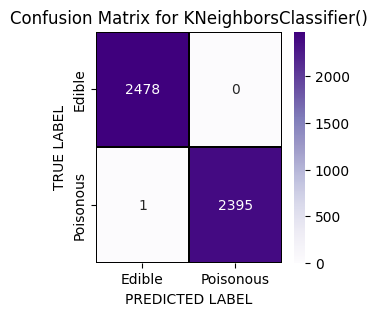

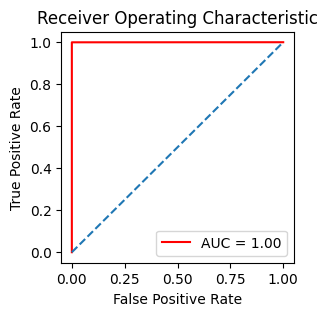

In [192]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9988

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1730
           1       1.00      1.00      1.00      1520

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250


ROC AUC Score:	0.9987

Confusion Matrix:



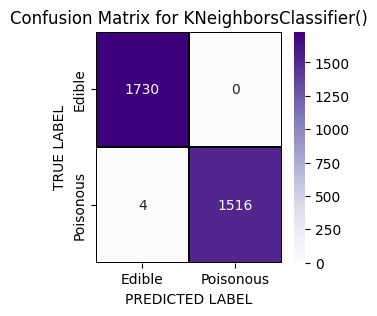

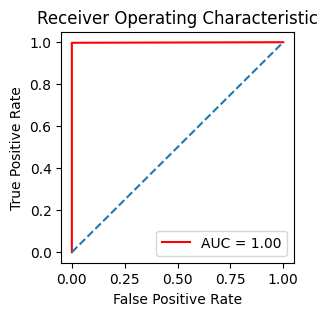

In [193]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Decision Tree

Training results:

Accuracy Score: 0.9879

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2478
           1       0.98      1.00      0.99      2396

    accuracy                           0.99      4874
   macro avg       0.99      0.99      0.99      4874
weighted avg       0.99      0.99      0.99      4874


Average Accuracy:	0.9727

Standard Deviation:	0.0119
ROC AUC Score:	0.9880

Confusion Matrix:



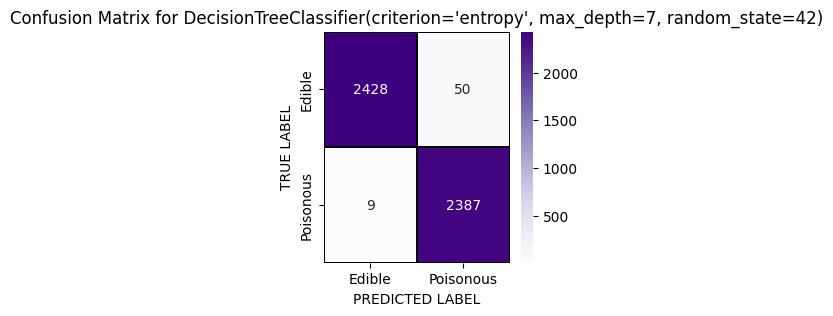

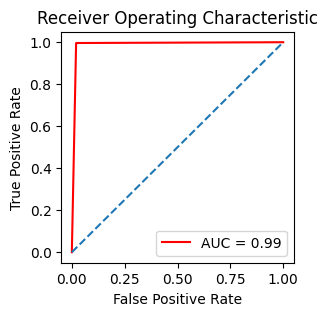

In [194]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy', max_depth=7, random_state=42)
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9840

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1730
           1       0.97      0.99      0.98      1520

    accuracy                           0.98      3250
   macro avg       0.98      0.98      0.98      3250
weighted avg       0.98      0.98      0.98      3250


ROC AUC Score:	0.9845

Confusion Matrix:



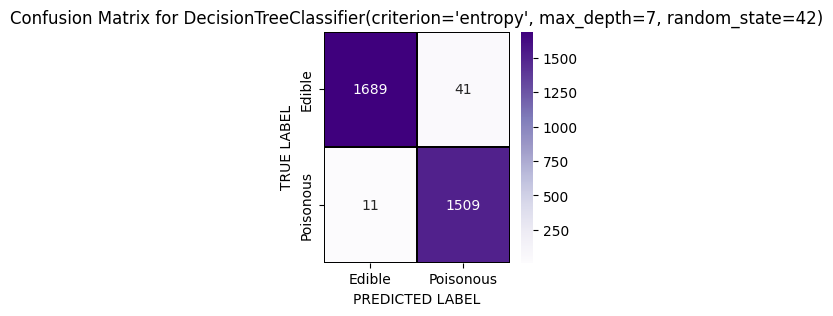

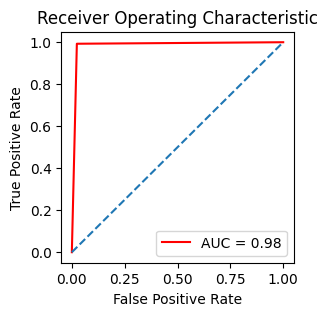

In [195]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Naive Bayes

Training results:

Accuracy Score: 0.9382

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2478
           1       0.95      0.92      0.94      2396

    accuracy                           0.94      4874
   macro avg       0.94      0.94      0.94      4874
weighted avg       0.94      0.94      0.94      4874


Average Accuracy:	0.9372

Standard Deviation:	0.0081
ROC AUC Score:	0.9380

Confusion Matrix:



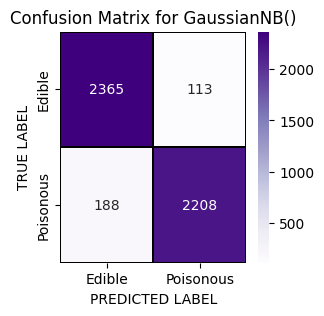

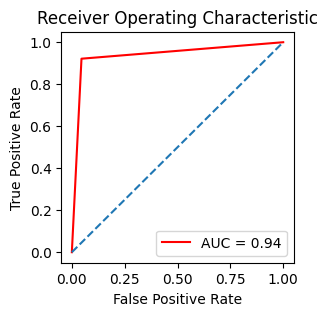

In [196]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 0.9274

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1730
           1       0.94      0.90      0.92      1520

    accuracy                           0.93      3250
   macro avg       0.93      0.93      0.93      3250
weighted avg       0.93      0.93      0.93      3250


ROC AUC Score:	0.9256

Confusion Matrix:



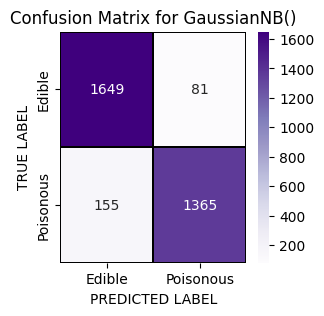

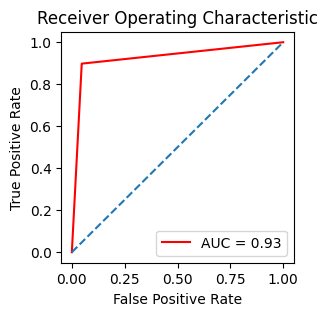

In [197]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

### Random Forest

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Average Accuracy:	0.9998

Standard Deviation:	0.0006
ROC AUC Score:	1.0000

Confusion Matrix:



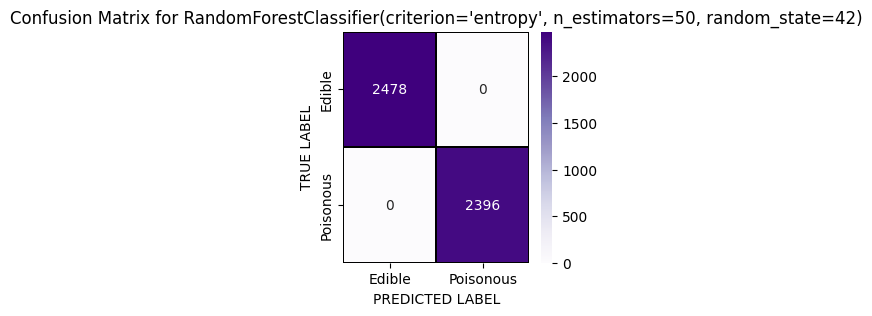

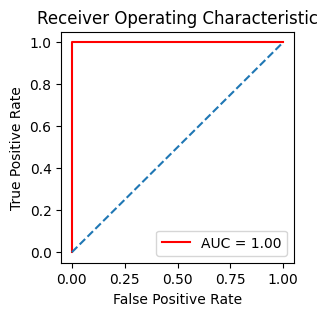

In [198]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=True)

Test results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1730
           1       1.00      1.00      1.00      1520

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250


ROC AUC Score:	1.0000

Confusion Matrix:



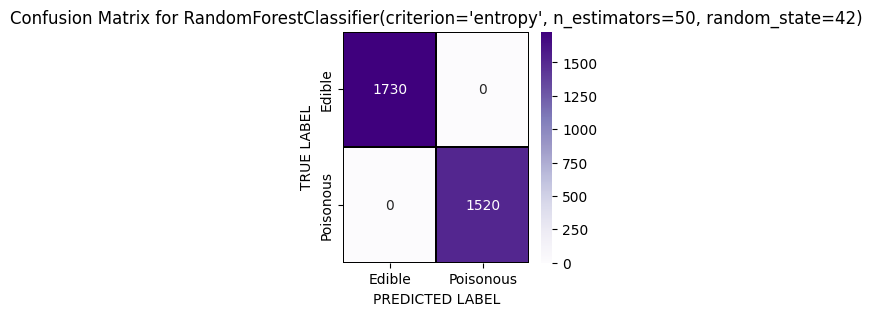

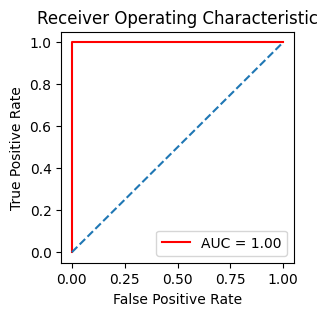

In [199]:
train_accuracy, test_accuracy, train_f1, test_f1, train_auc, test_auc = print_score(classifier, X_train, y_train, X_rem, y_rem, train=False)

In [200]:
import copy
final_train_accuracy.append(copy.deepcopy(train_accuracy))
final_test_accuracy.append(copy.deepcopy(test_accuracy))
final_train_f1.append(copy.deepcopy(train_f1))
final_test_f1.append(copy.deepcopy(test_f1))
final_train_auc.append(copy.deepcopy(train_auc))
final_test_auc.append(copy.deepcopy(test_auc))

print(final_train_accuracy)
print(final_test_accuracy)
print(final_train_f1)
print(final_test_f1)
print(final_train_auc)
print(final_test_auc)

[[0.9031596224866639, 0, 0.9983586376692655, 0.9852277390233894, 0.8883873615100534, 1.0], [0.9148543290931473, 0, 0.9991793188346327, 0.9885104636848584, 0.9343455067706196, 1.0], [0.9653262207632335, 0, 0.9997948297086582, 0.987894952810833, 0.9382437423061141, 1.0]]
[[0.8913846153846153, 0.9452307820320129, 0.9956923076923077, 0.9738461538461538, 0.8833846153846154, 0.9981538461538462], [0.9049230769230769, 0.9907692074775696, 0.9987692307692307, 0.9836923076923076, 0.9215384615384615, 1.0], [0.955076923076923, 0.9895384907722473, 0.9987692307692307, 0.984, 0.9273846153846154, 1.0]]
[[0.9029520633706737, 0, 0.998358601176319, 0.9852281868430953, 0.8883688208454452, 1.0], [0.9147251591139153, 0, 0.9991793188346327, 0.988511276277685, 0.934281924814412, 1.0], [0.9653178735534531, 0, 0.9997948289916113, 0.9878958094420227, 0.9382130999826325, 1.0]]
[[0.8908383768689404, 0.945205203158901, 0.9956914063385943, 0.9738606597938196, 0.8830969372092546, 0.9981536186290383], [0.90455047831676

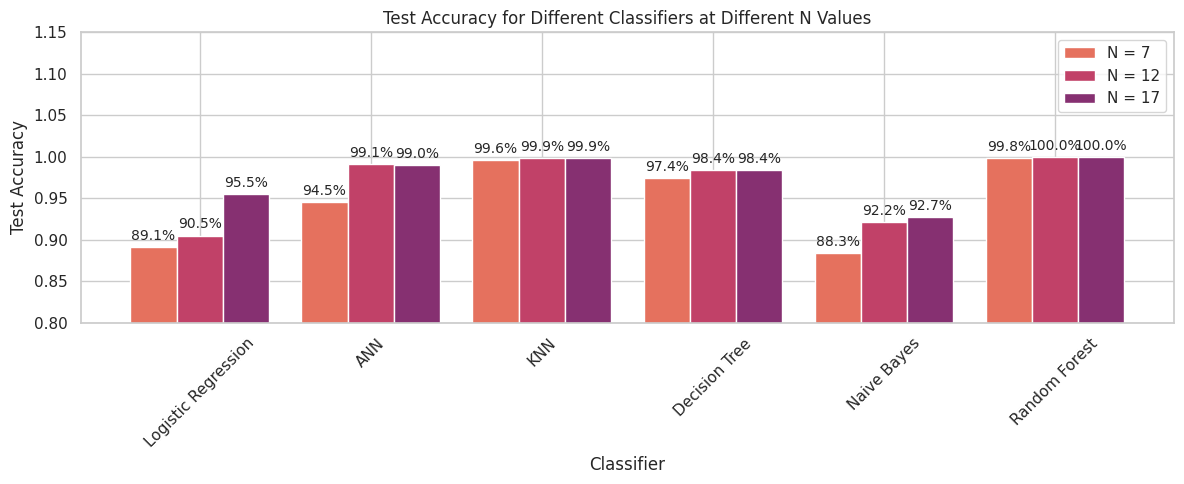

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N_values = [7, 12, 17]
classifier_name = ['Logistic Regression', 'ANN', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# Assuming you have the data for final_test_accuracy

# Convert the test_accuracy list into a NumPy array for easier indexing
final_test_accuracy = np.array(final_test_accuracy)

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the bar graph
width = 0.27  # Width of the bars
colors = sns.color_palette("flare", len(N_values))  # Sunset colors using Seaborn's "flare" color palette

plt.figure(figsize=(12, 5))
plt.ylim([0.8, 1.15])

for i, N in enumerate(N_values):
    x = np.arange(len(classifier_name)) + i * width
    plt.bar(x, final_test_accuracy[i], width=width, label=f'N = {N}', color=colors[i])
    # Add the value label above each bar
    for j, acc in enumerate(final_test_accuracy[i]):
        plt.text(x[j], acc + 0.005, f'{acc*100:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Classifiers at Different N Values')
plt.xticks(np.arange(len(classifier_name)) + width, classifier_name, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




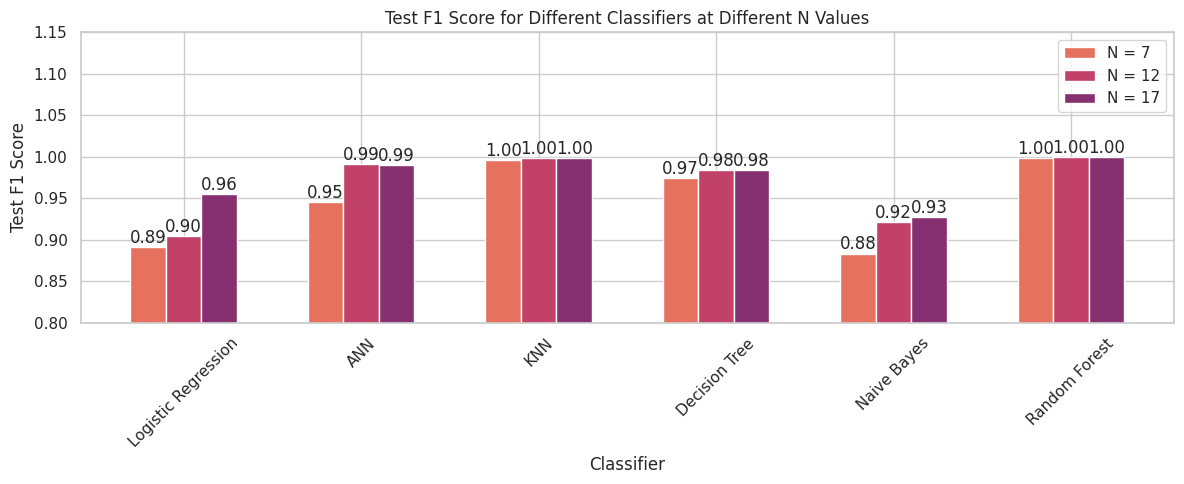

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N_values = [7, 12, 17]
classifier_name = ['Logistic Regression', 'ANN', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# Assuming you have the data for final_test_accuracy

# Convert the test_accuracy list into a NumPy array for easier indexing
final_test_f1 = np.array(final_test_f1)

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the bar graph
width = 0.2  # Width of the bars
colors = sns.color_palette("flare", len(N_values))  # Sunset colors using Seaborn's "flare" color palette

plt.figure(figsize=(12, 5))
plt.ylim([0.8, 1.15])

for i, N in enumerate(N_values):
    x = np.arange(len(classifier_name)) + i * width
    plt.bar(x, final_test_f1[i], width=width, label=f'N = {N}', color=colors[i])
    # Add the value label above each bar
    for j, acc in enumerate(final_test_f1[i]):
        plt.text(x[j], acc + 0.005, f'{acc:.2f}', ha='center')

plt.xlabel('Classifier')
plt.ylabel('Test F1 Score')
plt.title('Test F1 Score for Different Classifiers at Different N Values')
plt.xticks(np.arange(len(classifier_name)) + width, classifier_name, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

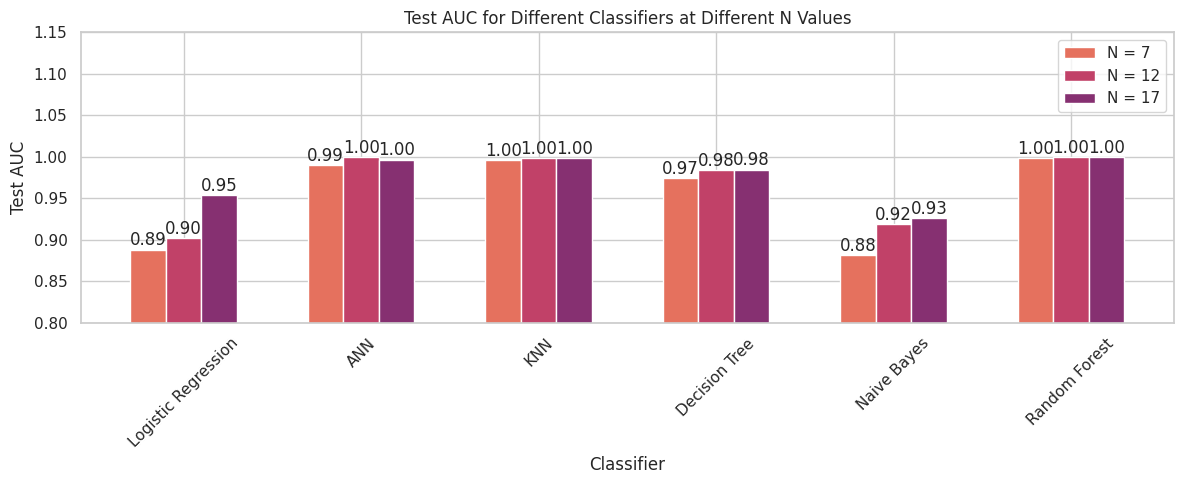

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N_values = [7, 12, 17]
classifier_name = ['Logistic Regression', 'ANN', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# Assuming you have the data for final_test_accuracy

# Convert the test_accuracy list into a NumPy array for easier indexing
final_test_auc = np.array(final_test_auc)

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the bar graph
width = 0.2  # Width of the bars
colors = sns.color_palette("flare", len(N_values))  # Sunset colors using Seaborn's "flare" color palette

plt.figure(figsize=(12, 5))
plt.ylim([0.8, 1.15])

for i, N in enumerate(N_values):
    x = np.arange(len(classifier_name)) + i * width
    plt.bar(x, final_test_auc[i], width=width, label=f'N = {N}', color=colors[i])
    # Add the value label above each bar
    for j, acc in enumerate(final_test_auc[i]):
        plt.text(x[j], acc + 0.005, f'{acc:.2f}', ha='center')

plt.xlabel('Classifier')
plt.ylabel('Test AUC')
plt.title('Test AUC for Different Classifiers at Different N Values')
plt.xticks(np.arange(len(classifier_name)) + width, classifier_name, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Traits of a poisonous mushrooms

In [203]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict (LabelEncoder)
Xfit = X_poisonous.apply(lambda x: d[x.name].fit_transform(x))

In [204]:
le_y = LabelEncoder()
yfit = le_y.fit_transform(y_poisonous)

In [205]:
import warnings
from collections import defaultdict
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

warnings.filterwarnings("ignore")

ohc = defaultdict(OneHotEncoder)
final = pd.DataFrame()

for i in range(22):
    # transforming the columns using One hot encoder
    Xtemp_i = pd.DataFrame(ohc[Xfit.columns[i]].fit_transform(Xfit.iloc[:, i:i+1]).toarray())

    # Naming the columns as per label encoder
    ohc_obj = ohc[Xfit.columns[i]]
    categories = ohc_obj.categories_[0]
    Xtemp_i.columns = [f"{Xfit.columns[i]}_{categories[j]}" for j in range(len(categories))]

    # taking care of the dummy variable trap
    X_ohc_i = Xtemp_i.iloc[:, 1:]

    # appending the columns to the final dataframe
    final = pd.concat([final, X_ohc_i], axis=1)

In [206]:
from sklearn.neighbors import KNeighborsClassifier
n_features = final.shape[1]
clf = KNeighborsClassifier()
feature_score = []

for i in range(n_features):
    X_feature = np.reshape(final.iloc[:, i:i+1].values, (-1, 1))
    scores = cross_val_score(clf, X_feature, yfit)
    feature_score.append(scores.mean())
    print('%40s        %g' % (final.columns[i], scores.mean()))

                             cap-shape_1        0.518218
                             cap-shape_2        0.517971
                             cap-shape_3        0.554425
                             cap-shape_4        0.517971
                             cap-shape_5        0.493233
                           cap-surface_1        0.517971
                           cap-surface_2        0.517971
                           cap-surface_3        0.531387
                             cap-color_1        0.515508
                             cap-color_2        0.517971
                             cap-color_3        0.517971
                             cap-color_4        0.517971
                             cap-color_5        0.521906
                             cap-color_6        0.517971
                             cap-color_7        0.516124
                             cap-color_8        0.517848
                             cap-color_9        0.517971
                               

### The 5 most important factors : to determine poisonous or not

In [207]:
feat_imp = pd.Series(data = feature_score, index = final.columns)
feat_imp.sort_values(ascending=False, inplace=True)
feat_imp[feat_imp>0.7]

odor_2                        0.783837
stalk-surface-above-ring_1    0.774483
stalk-surface-below-ring_1    0.766112
gill-size_1                   0.722575
spore-print-color_1           0.707014
dtype: float64

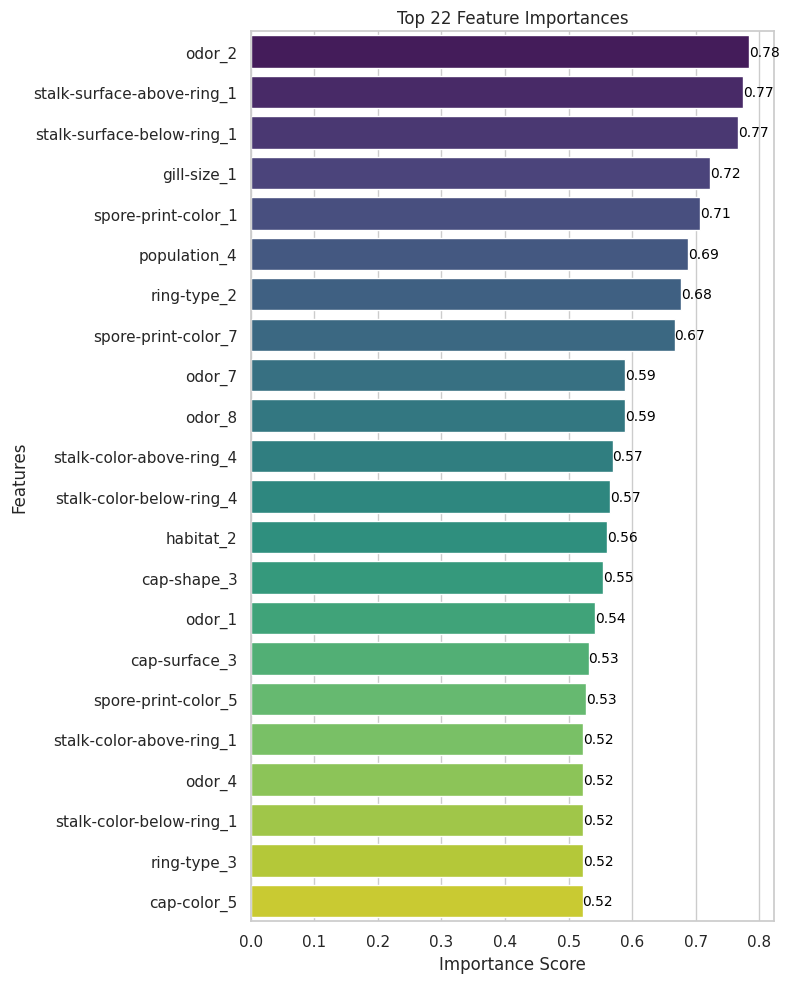

In [208]:

# Sort the feature importances in descending order and reverse the order
feat_imp_sorted = feat_imp.sort_values(ascending=False)[:22][::-1]

# Create a horizontal bar plot with the highest value on top using Seaborn
plt.figure(figsize=(8, 10))
ax = sns.barplot(x=feat_imp_sorted.values[::-1], y=feat_imp_sorted.index[::-1], palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 22 Feature Importances')
plt.tight_layout()
# Annotate the plot with the corresponding values
for index, value in enumerate(feat_imp_sorted.values[::-1]):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize = '10')
plt.show()

In [209]:
columns_imp = feat_imp[feat_imp>0.7].index.values
final_Xy= pd.concat([final,pd.DataFrame(yfit,columns=['class'])], axis=1)
grouped = final_Xy.groupby('class')

In [210]:
# Edible group of mushrooms
grouped.get_group(0)[columns_imp].sum()

odor_2                          0.0
stalk-surface-above-ring_1    144.0
stalk-surface-below-ring_1    144.0
gill-size_1                   288.0
spore-print-color_1            48.0
dtype: float64

In [211]:
# Poisonous group of mushrooms
grouped.get_group(1)[columns_imp].sum()

odor_2                        2160.0
stalk-surface-above-ring_1    2228.0
stalk-surface-below-ring_1    2160.0
gill-size_1                   2224.0
spore-print-color_1           1584.0
dtype: float64